In [1]:
from data_loader import Data_Loader
import pm4py
 
num = 1
path = f'/Users/philippeichhorn/Downloads/Compositional process discovery_experiment data/IP-{num}/IP-{num}_initial_log.xes'
list_of_nets = Data_Loader.create_petri_nets(path)

/Users/philippeichhorn/anaconda3/envs/i2dl/lib/python3.10/site-packages/pm4py/util/dt_parsing/parser.py:77: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(
/Users/philippeichhorn/anaconda3/envs/i2dl/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 5000/5000 [00:02<00:00, 1871.73it/s]


In [2]:
from pm4py.objects.petri_net.utils import petri_utils
import pm4py.objects.petri_net.utils as pnutils
from pm4py.objects.petri_net.obj import PetriNet

class InteractionUtils:

    @staticmethod
    def connect_async_interactions(net: PetriNet):
        for trans in net.transitions:
            if trans.label and '!' in trans.label:
                trans.properties.update({"sync": '!'})
                for trans2 in net.transitions:
                    if trans2.label == trans.label.replace('!', '?'):
                        trans2.properties.update({"sync": '?'})
                        new_place = pnutils.petri_utils.add_place(net, "async", )
                        new_place.properties.update({"sync":True})
                        pnutils.petri_utils.add_arc_from_to(trans, new_place,net)
                        pnutils.petri_utils.add_arc_from_to(new_place, trans2, net)

    @staticmethod
    def connect_sync_interactions(net:PetriNet):
        for trans in net.transitions.copy():
            for trans2 in net.transitions.copy():
                if net.transitions.__contains__(trans2):
                    if trans.name == trans2.name:
                        for arc in trans2.in_arcs.copy():
                            petri_utils.add_arc_from_to(arc.source, trans, net)
                        for arc in trans2.out_arcs.copy():
                            petri_utils.add_arc_from_to(trans, arc.target , net)
                        trans.properties.update({"sync":"s"})
                        petri_utils.remove_transition(net, trans2)


    @staticmethod
    def merge_two_nets(a, b):
        merged_net = pnutils.petri_utils.merge(nets=[a, b])
        InteractionUtils.connect_async_interactions(merged_net)
        #InteractionUtils.connect_sync_interactions(merged_net)
        return merged_net

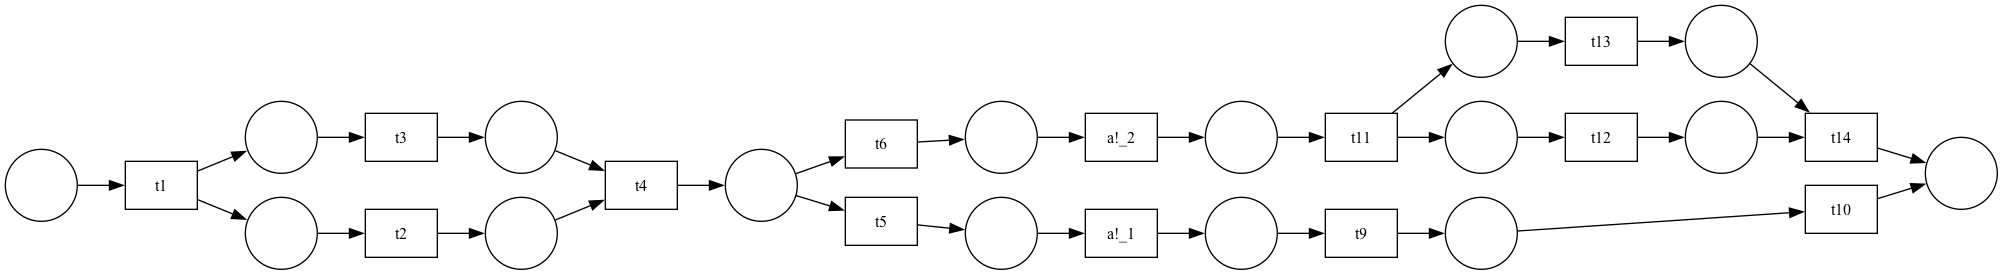

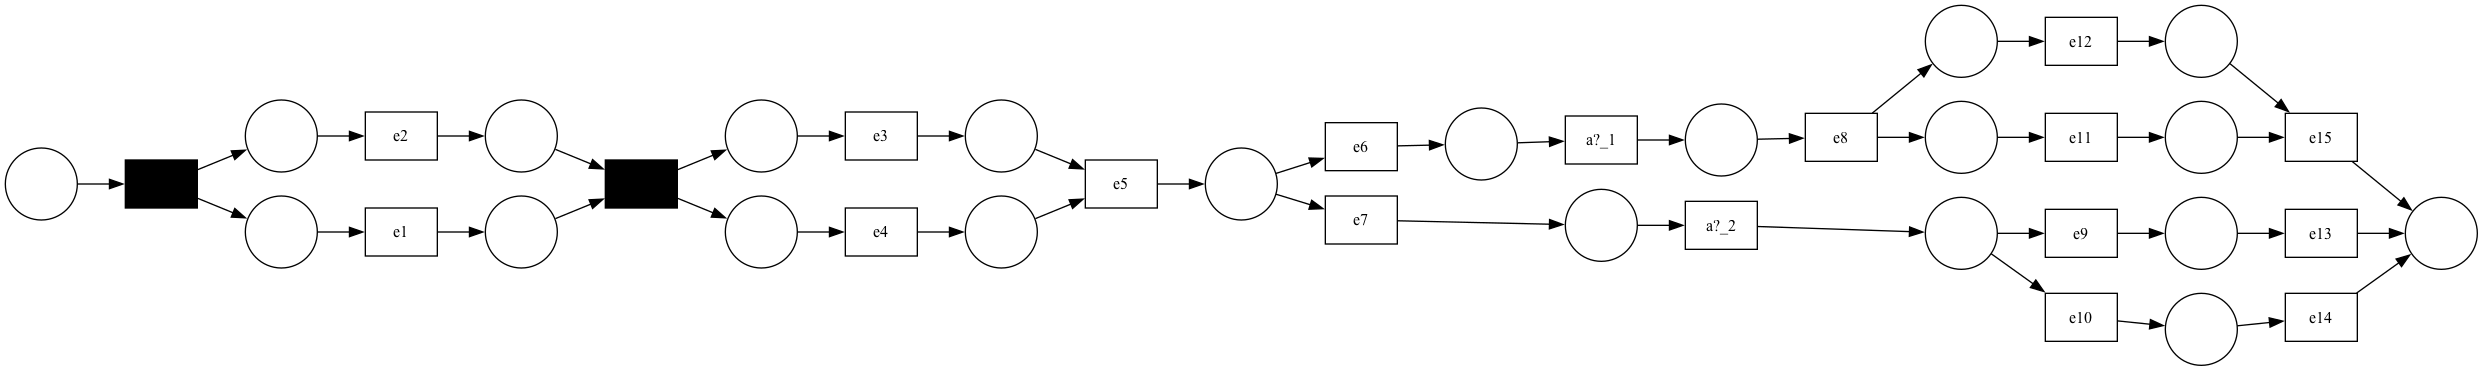

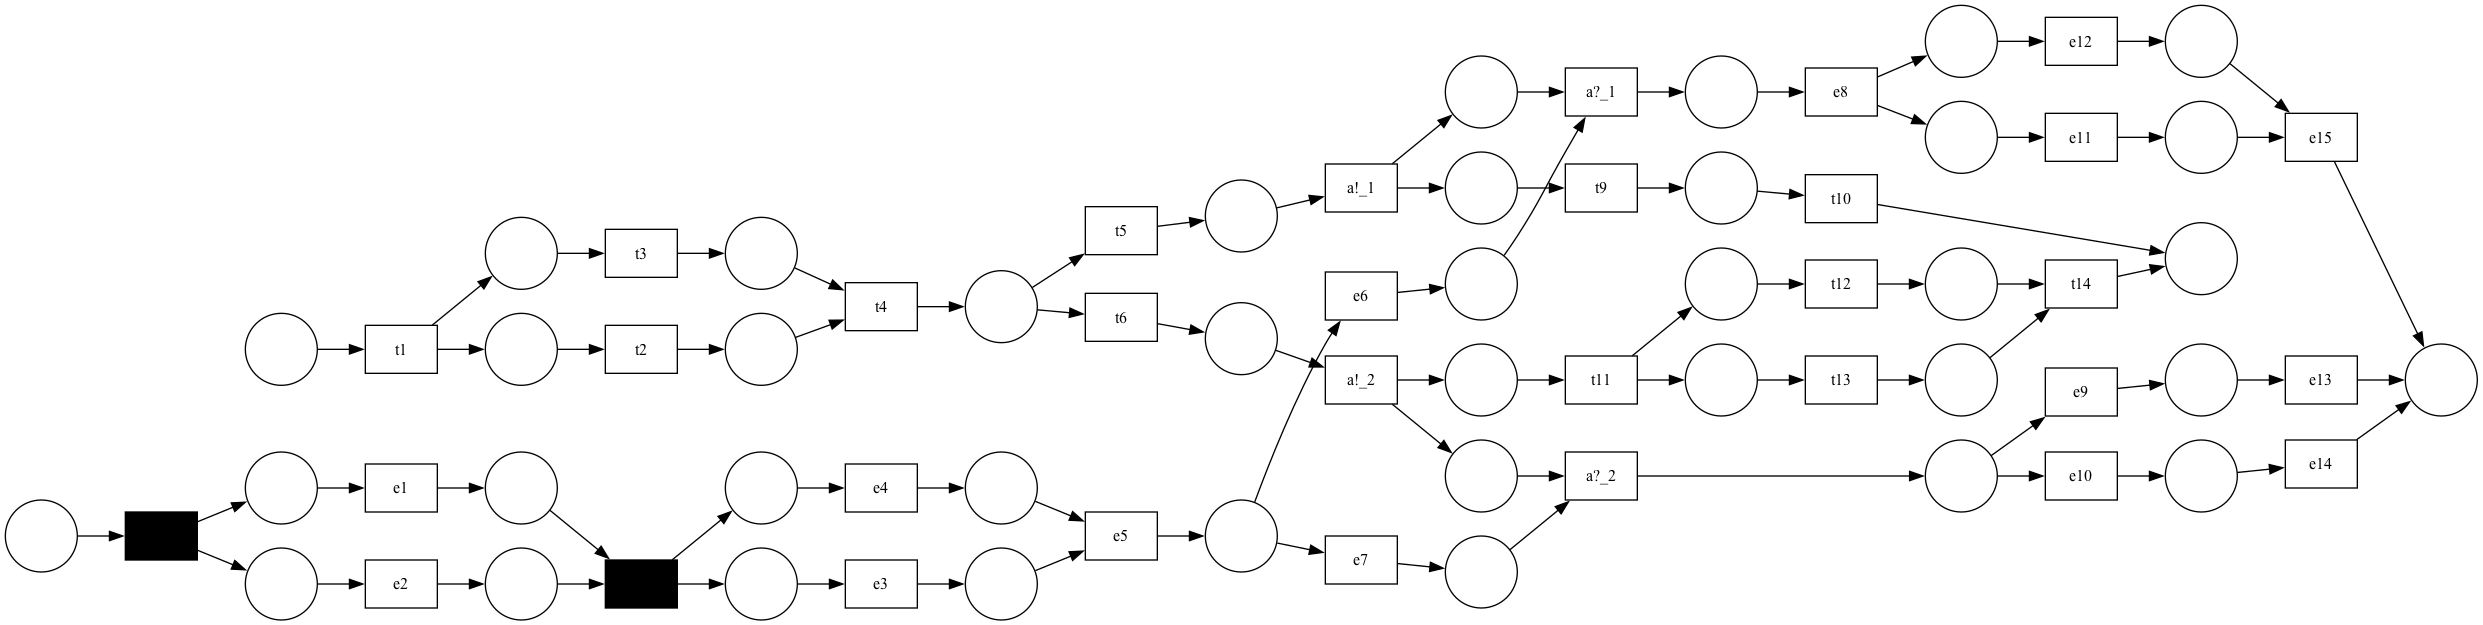

In [3]:

net1, b,b = list_of_nets[0]
net2, b,b = list_of_nets[1]
pm4py.view_petri_net(net1)
pm4py.view_petri_net(net2)

net = InteractionUtils.merge_two_nets(net1, net2)
pm4py.view_petri_net(net)



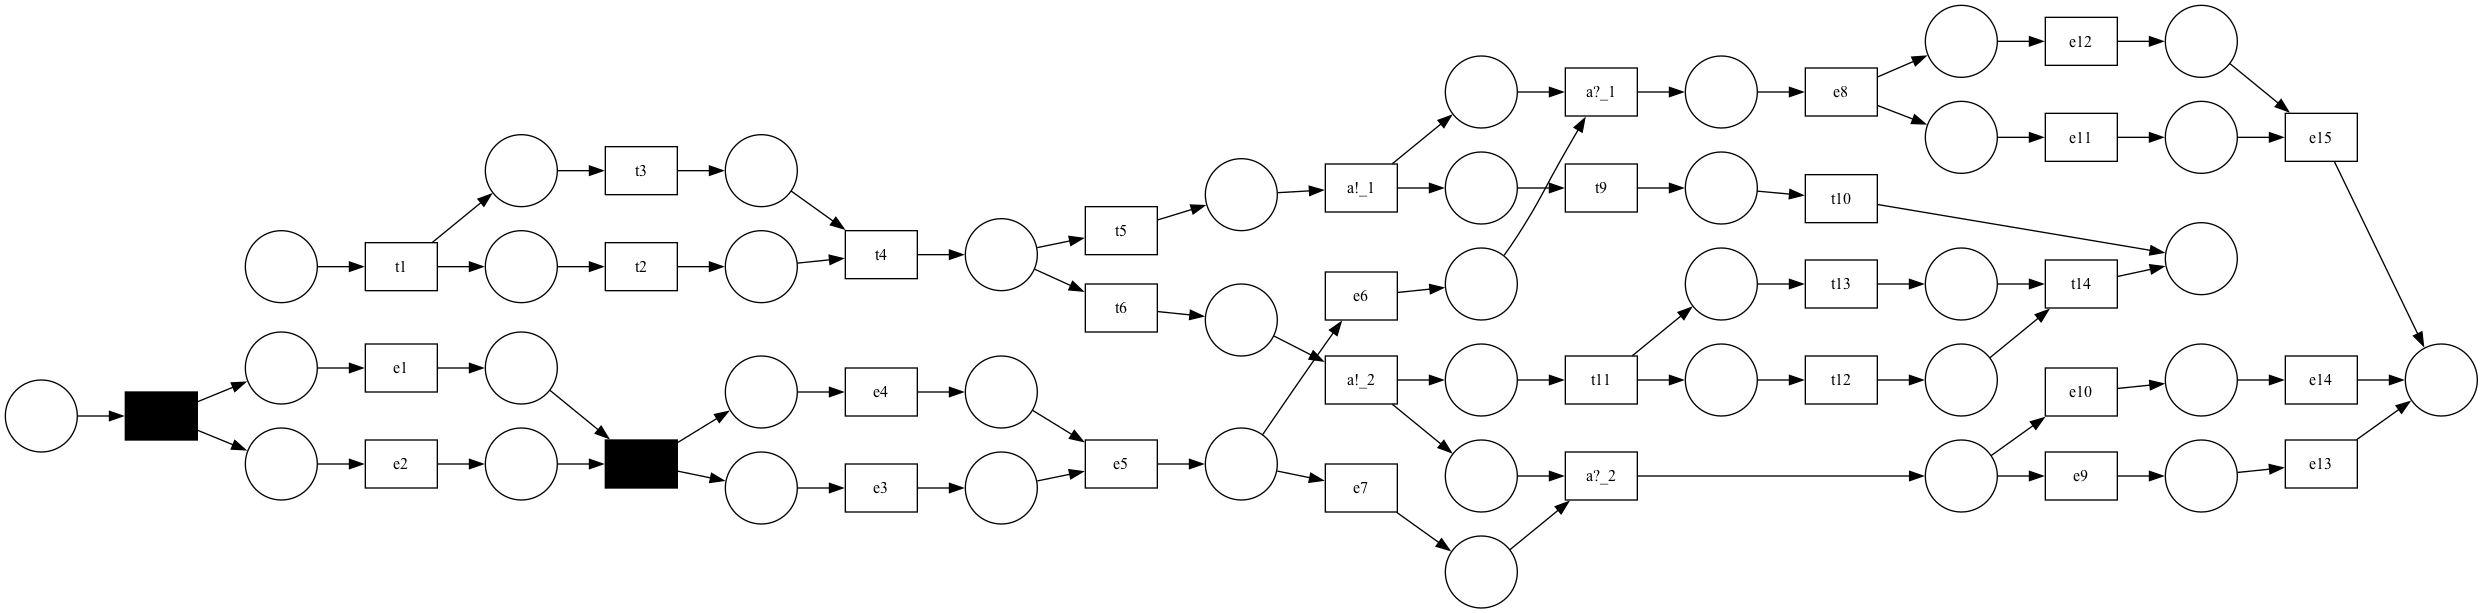

true 1
case 1
e2


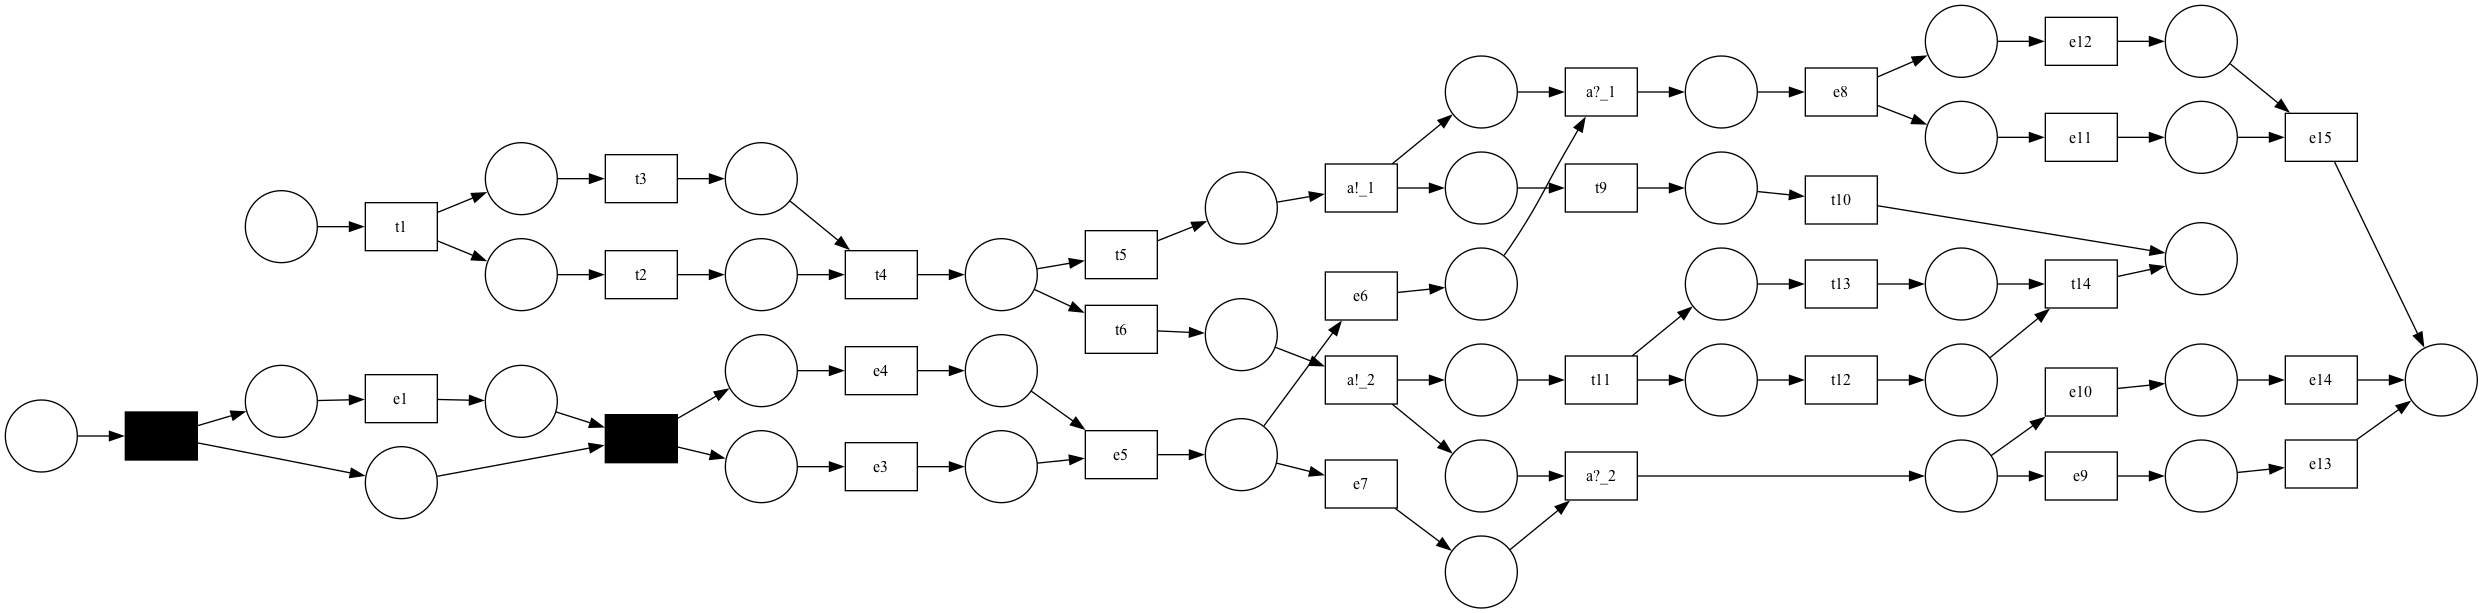

Local transition removed
true 1
case 2
e6


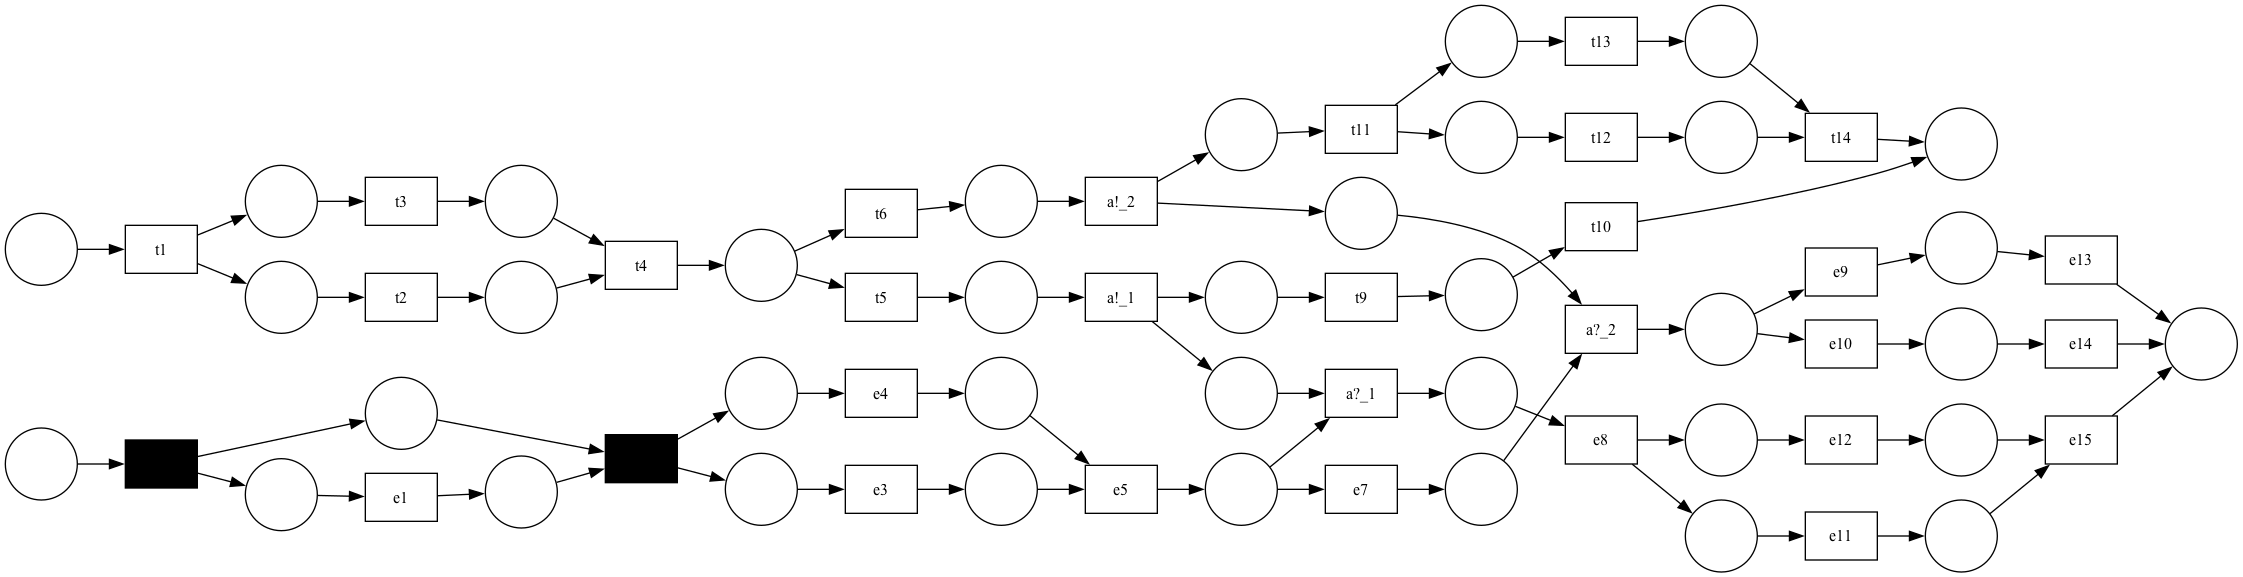

Local transition removed
true 1
case 1
t3


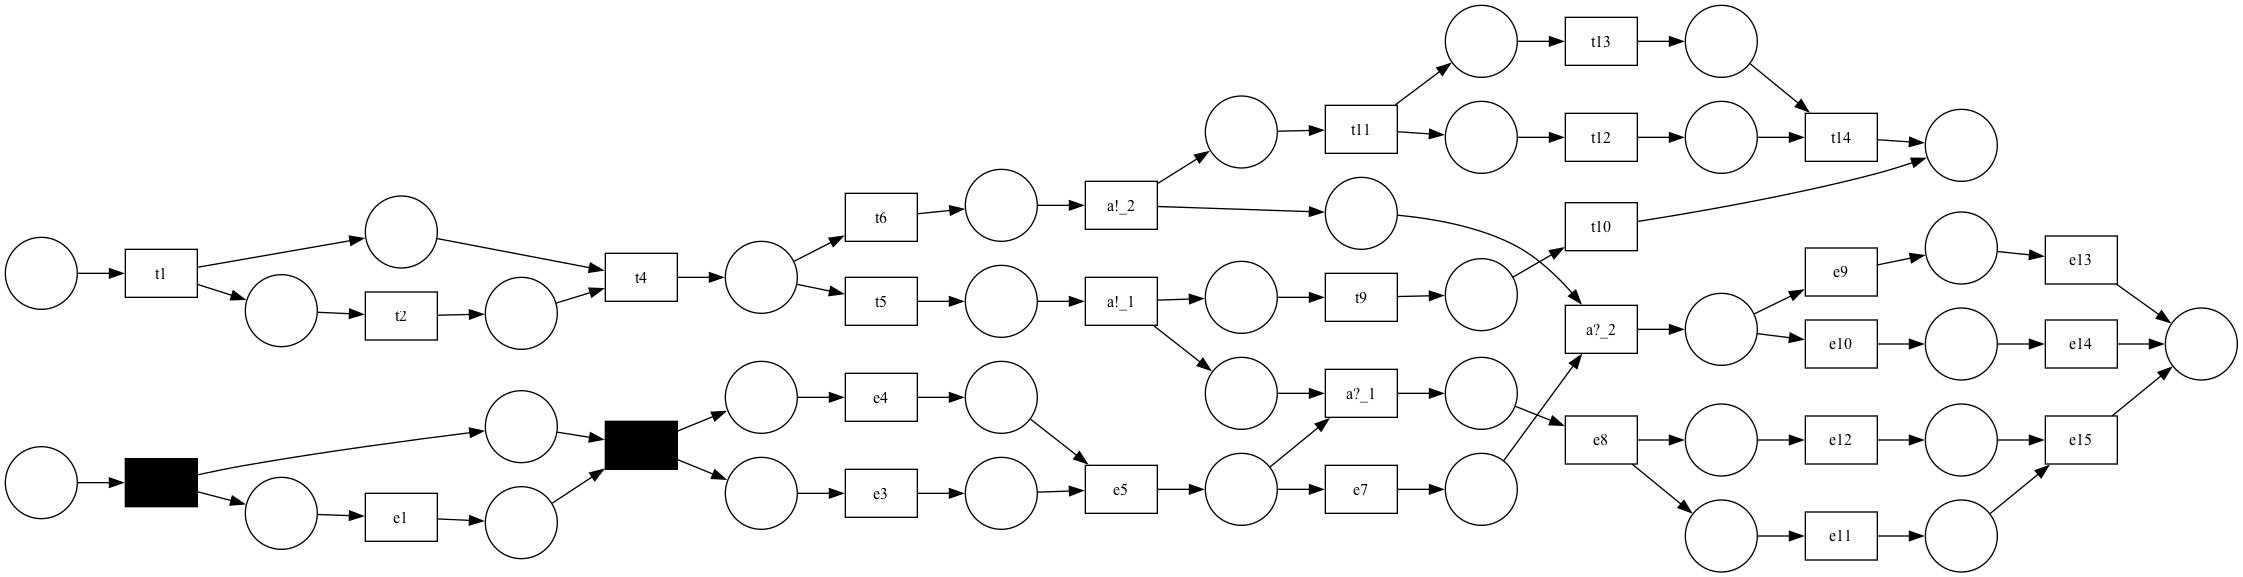

Local transition removed
true 1
case 2
e7


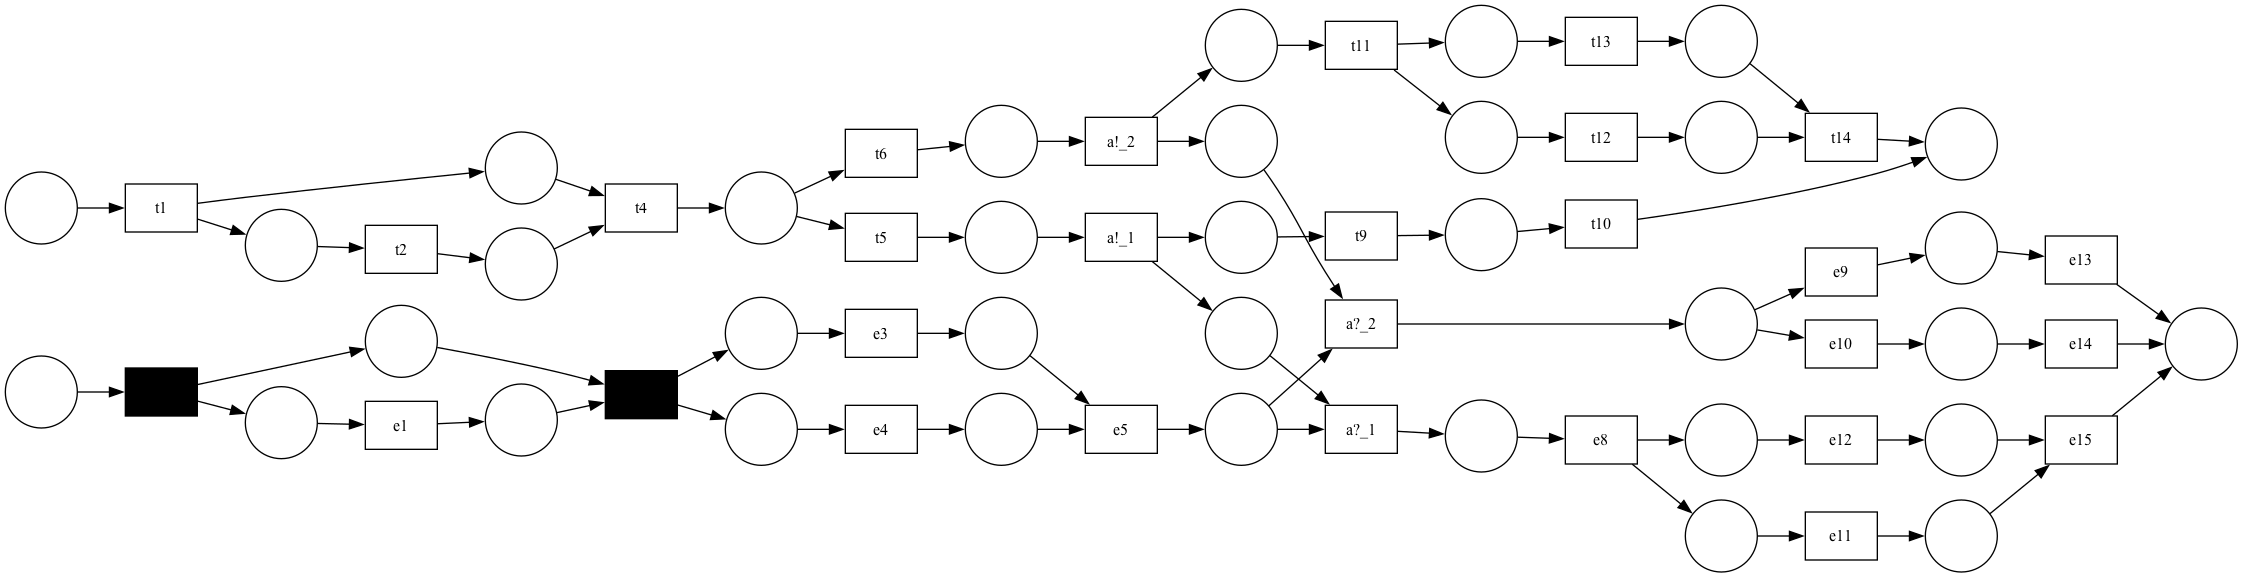

Local transition removed
true 1
case 2
t6


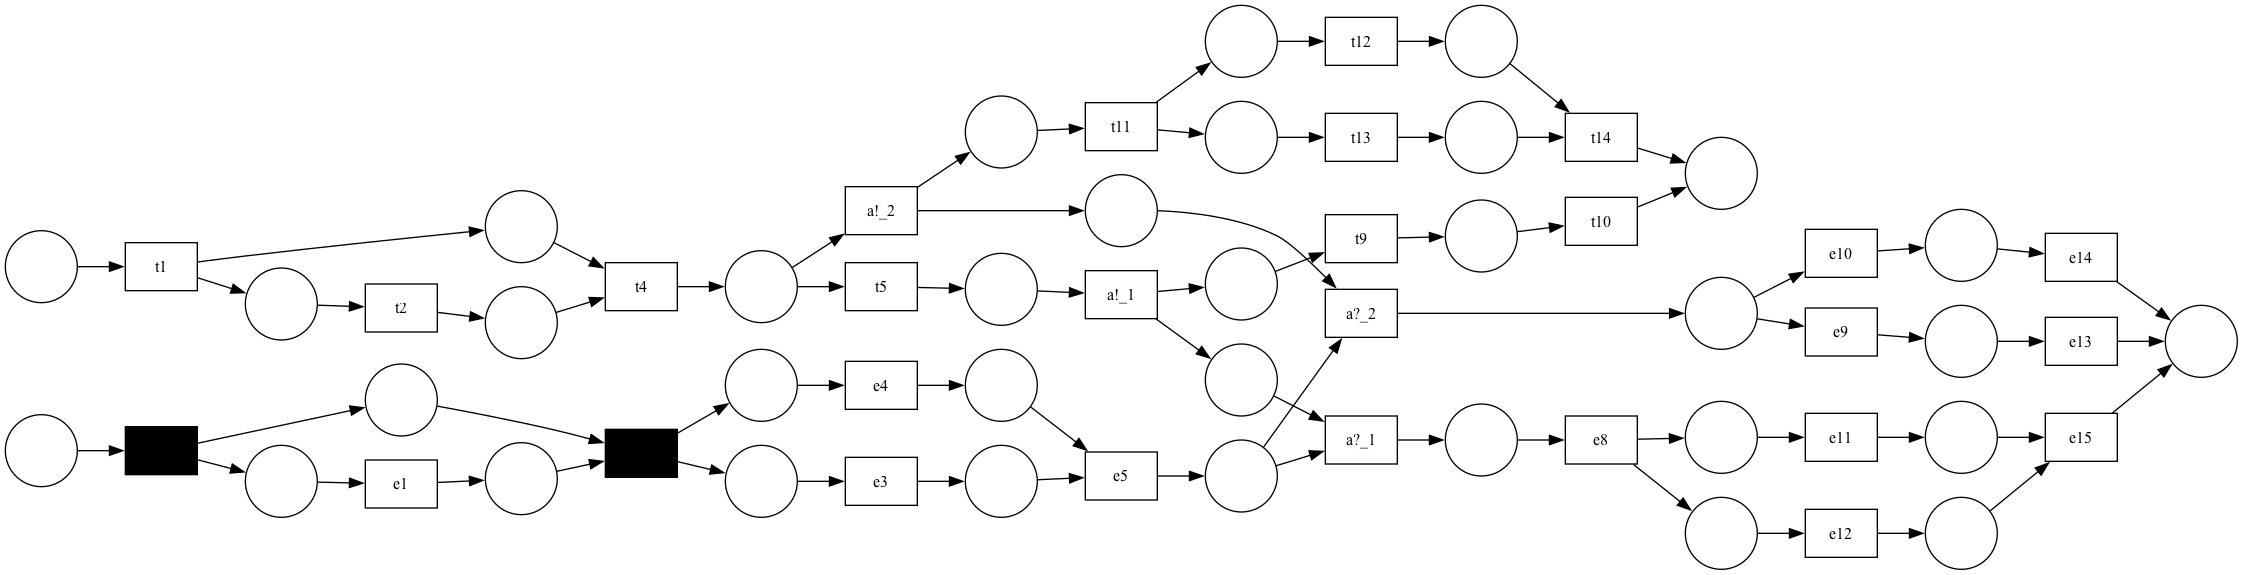

Local transition removed
true 1
case 1
e1


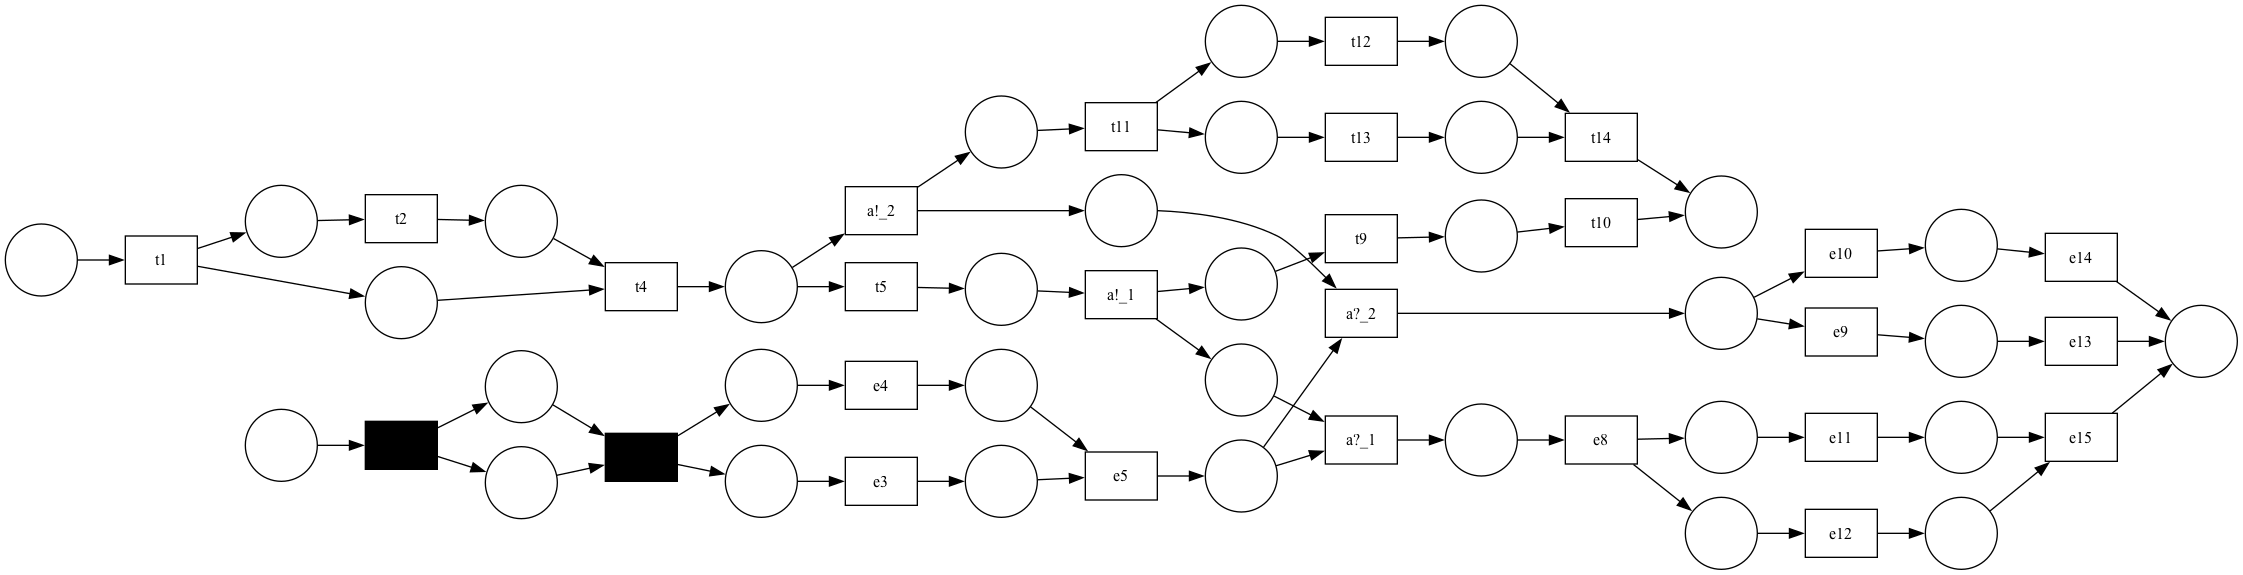

Local transition removed
true 1
case 2
e9


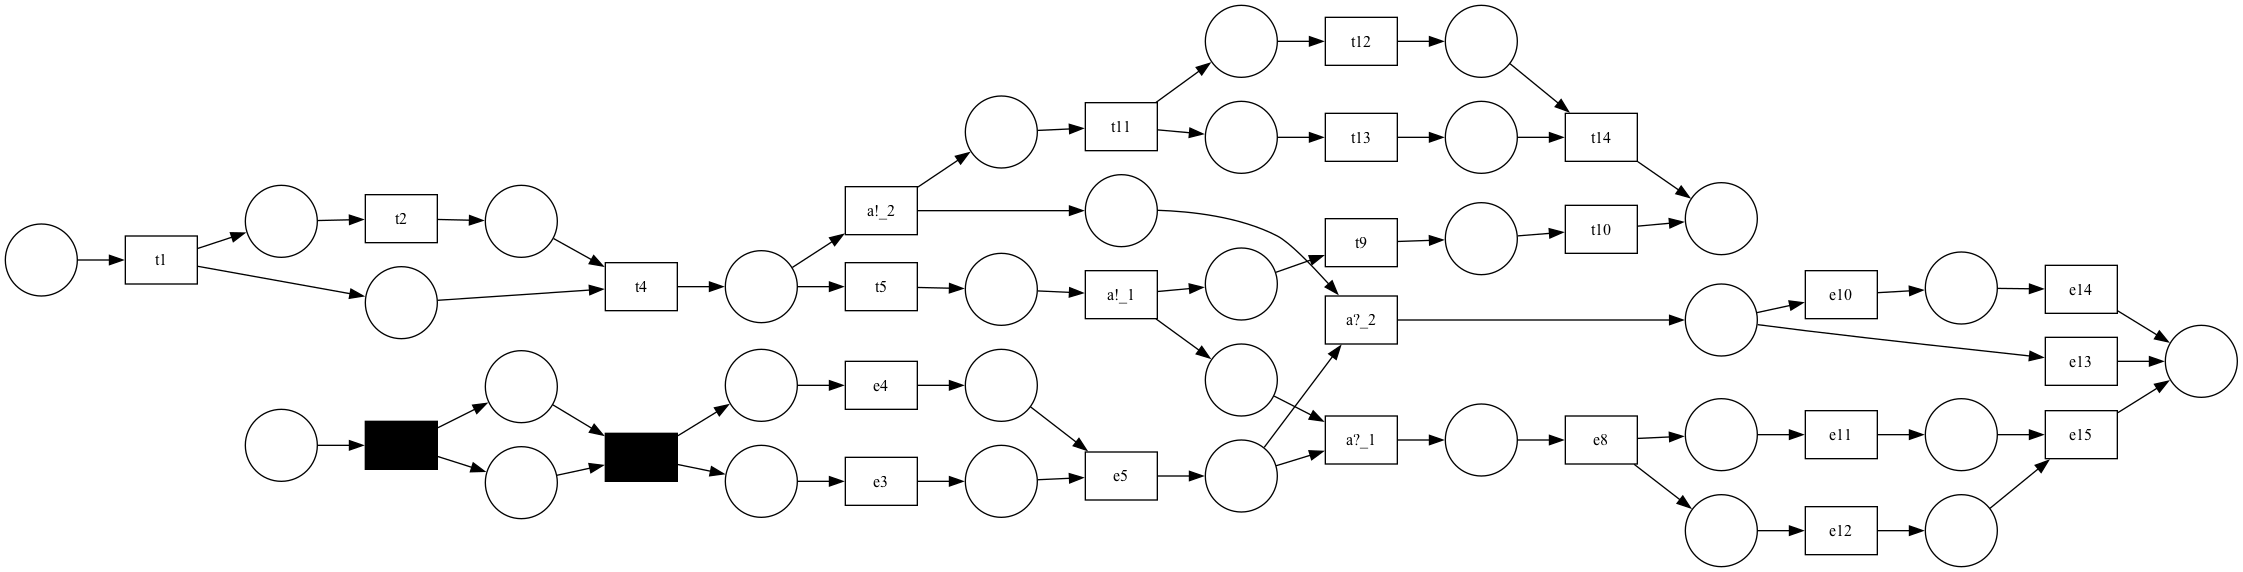

Local transition removed
true 1
case 1
e14


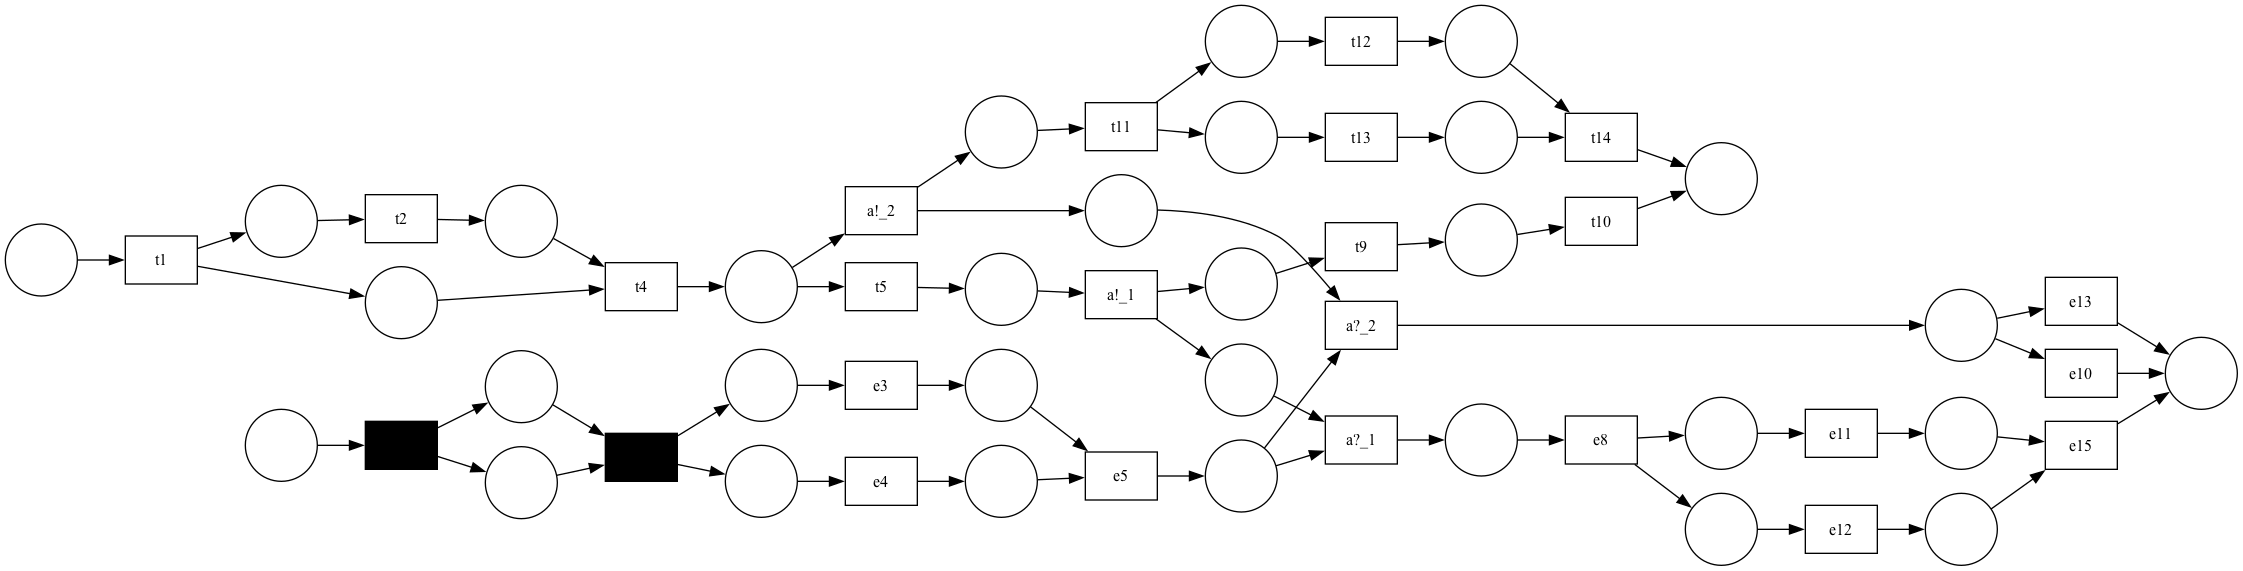

Local transition removed
true 1
case 1
e12


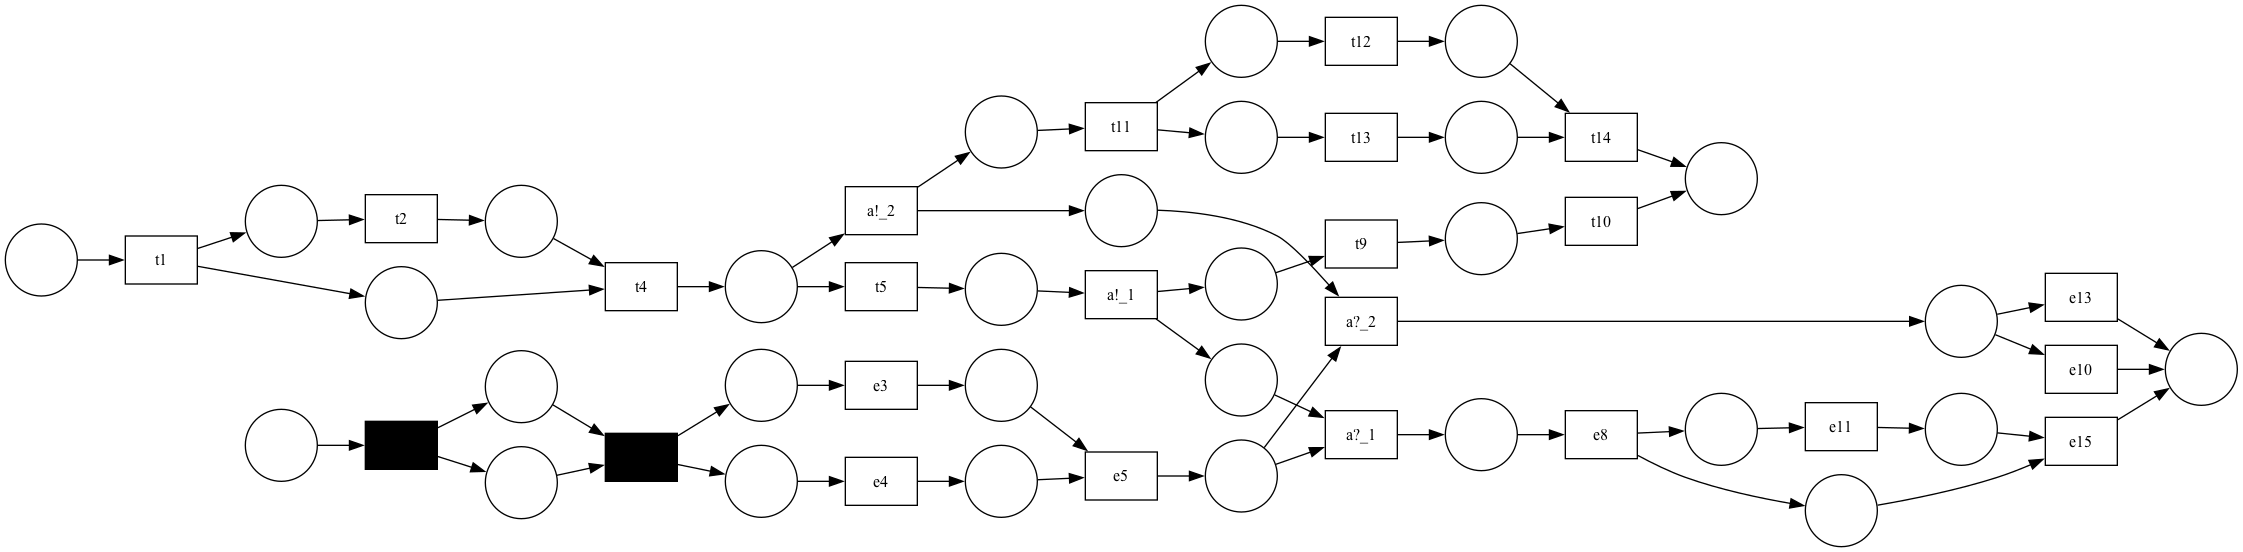

Local transition removed
true 1
case 1
t12


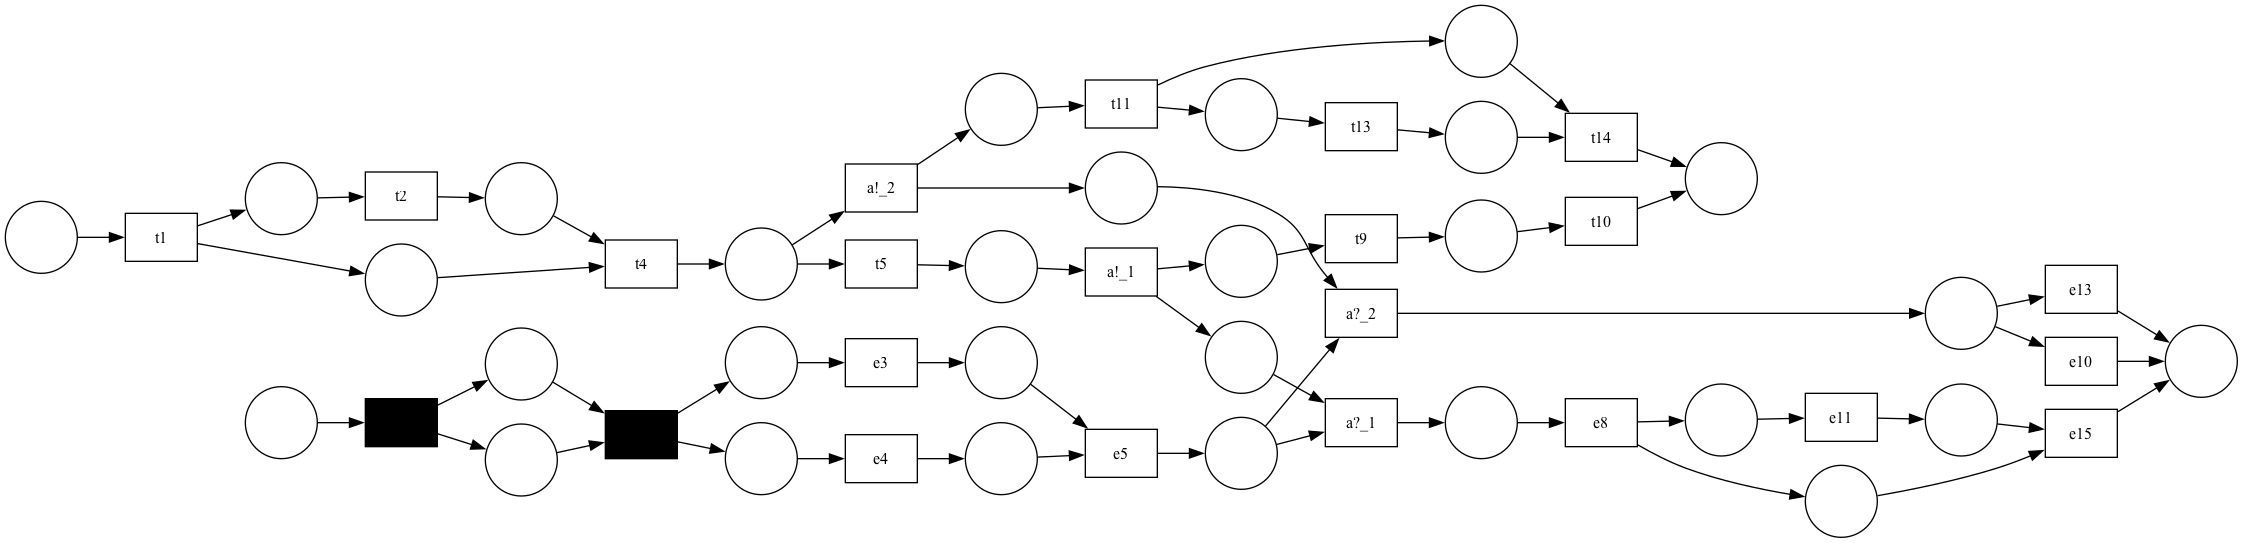

Local transition removed
true 1
case 1
t2


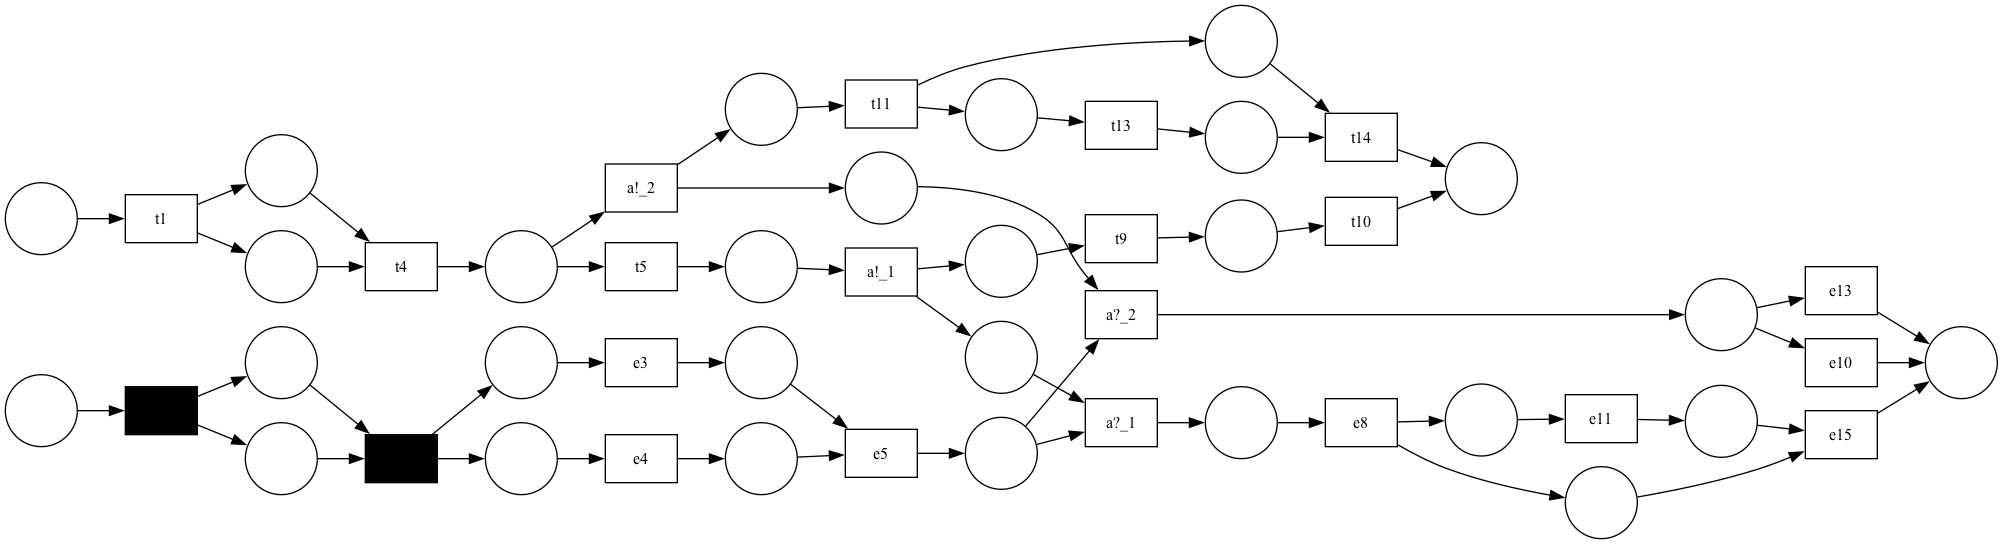

Local transition removed
true 1
case 1
t10


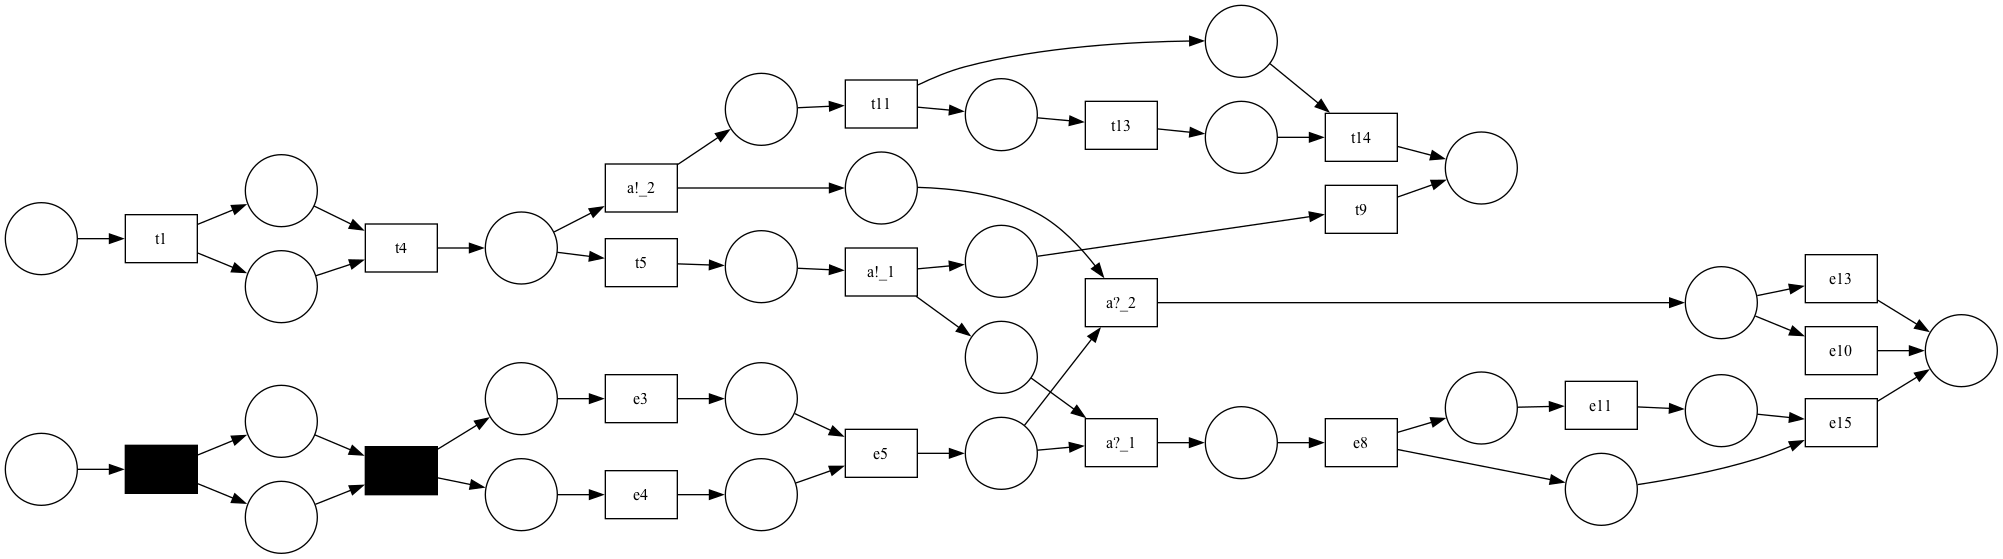

Local transition removed
true 1
case 1
t9


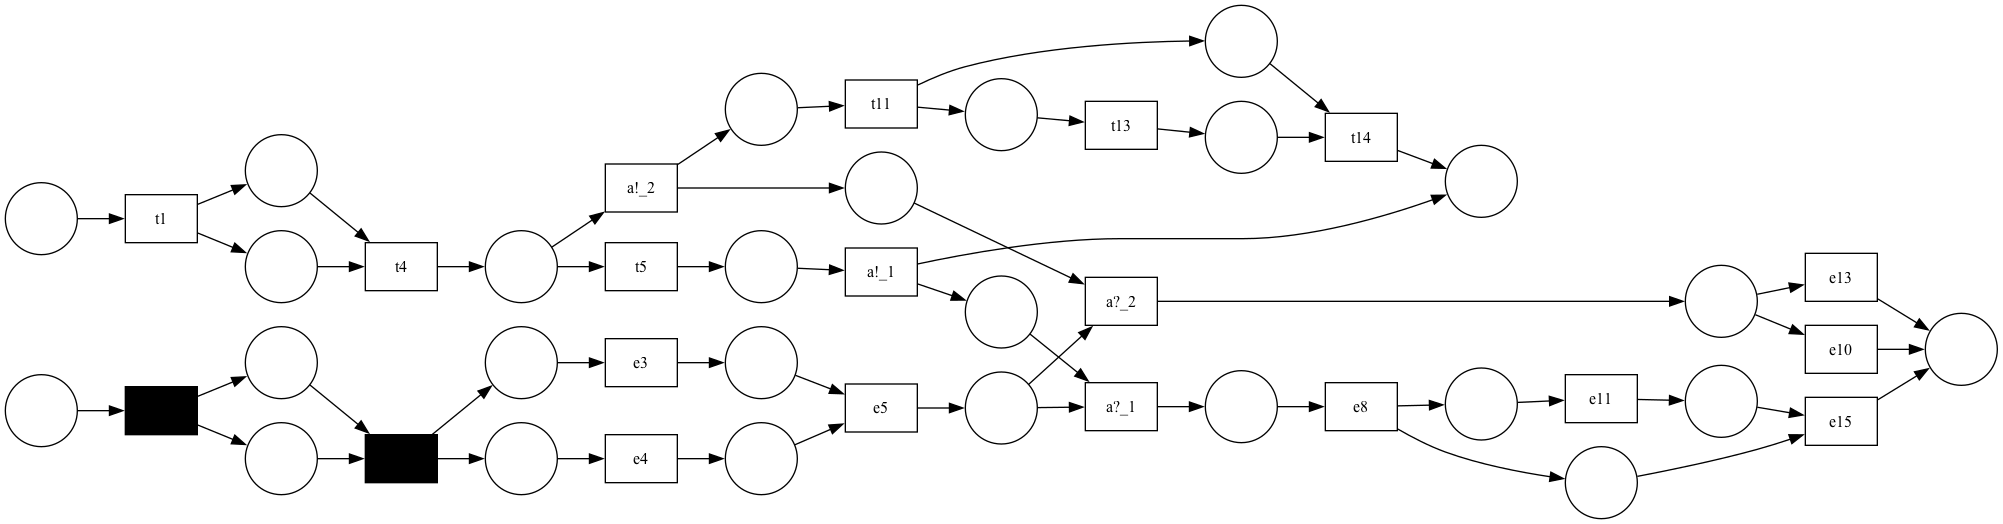

Local transition removed
true 1
true 1
case 1
e3


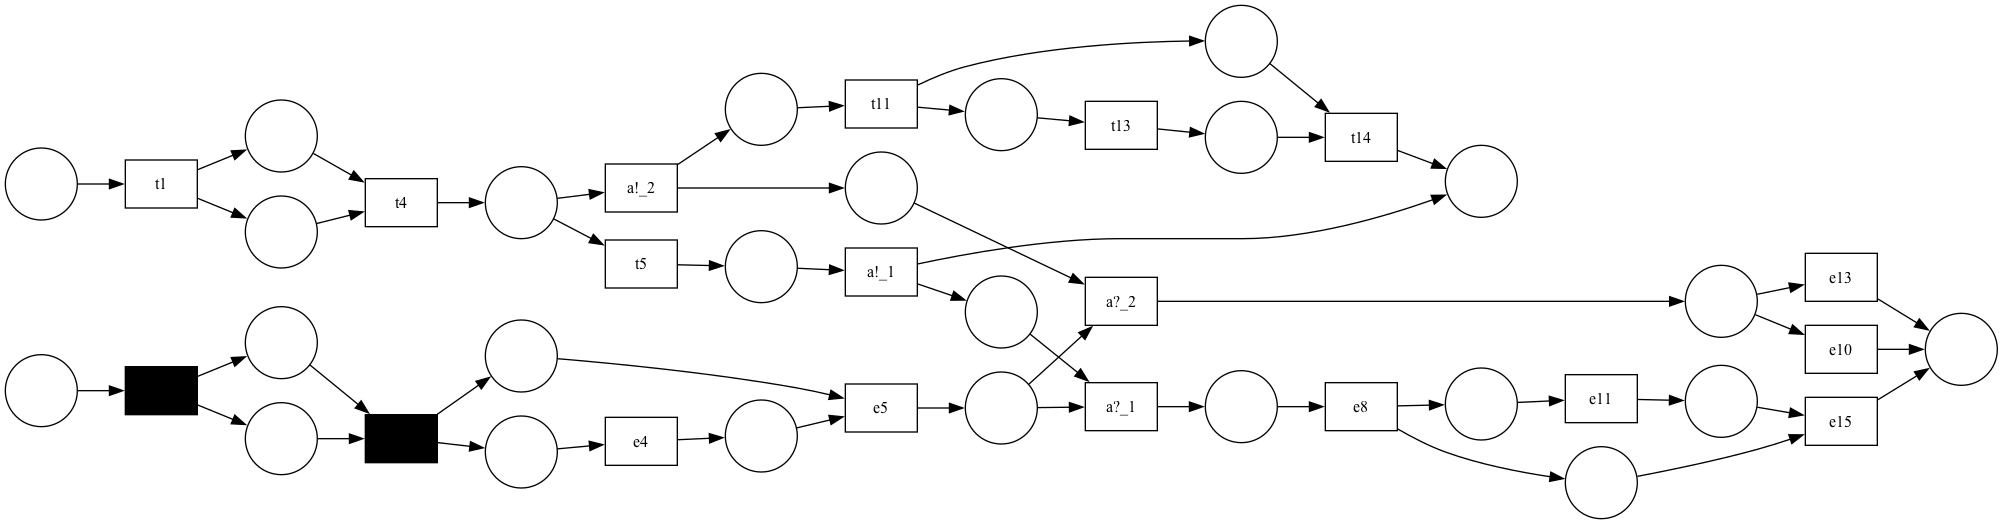

Local transition removed
true 1
case 1
t13


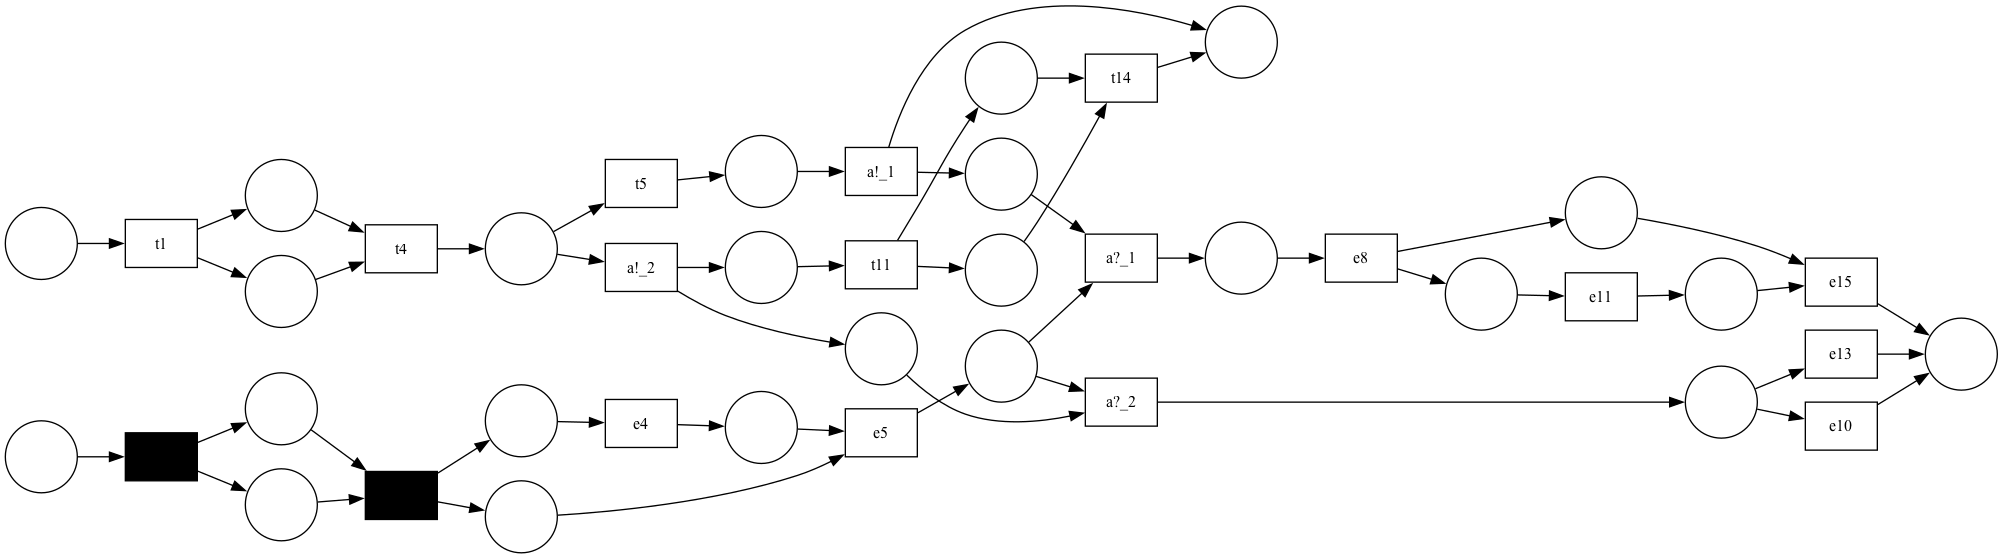

Local transition removed
true 1
case 1
e11


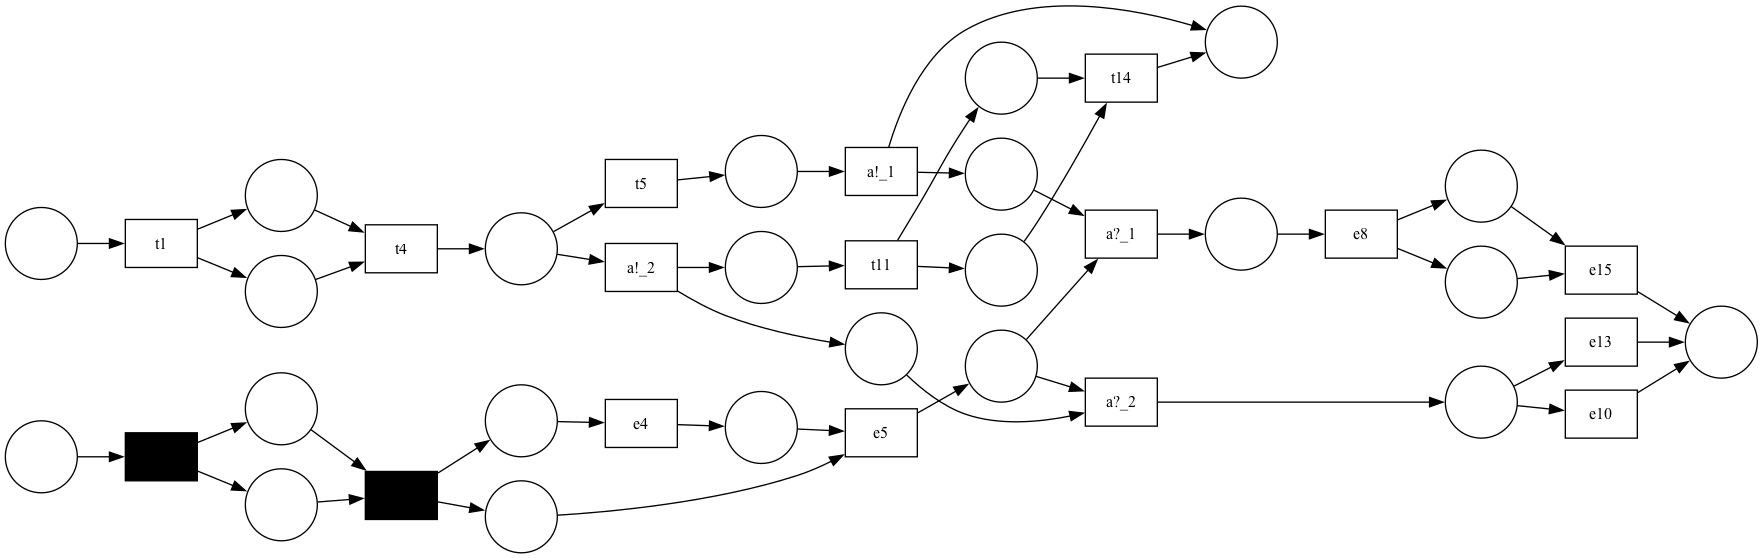

Local transition removed
true 1
case 1
e4


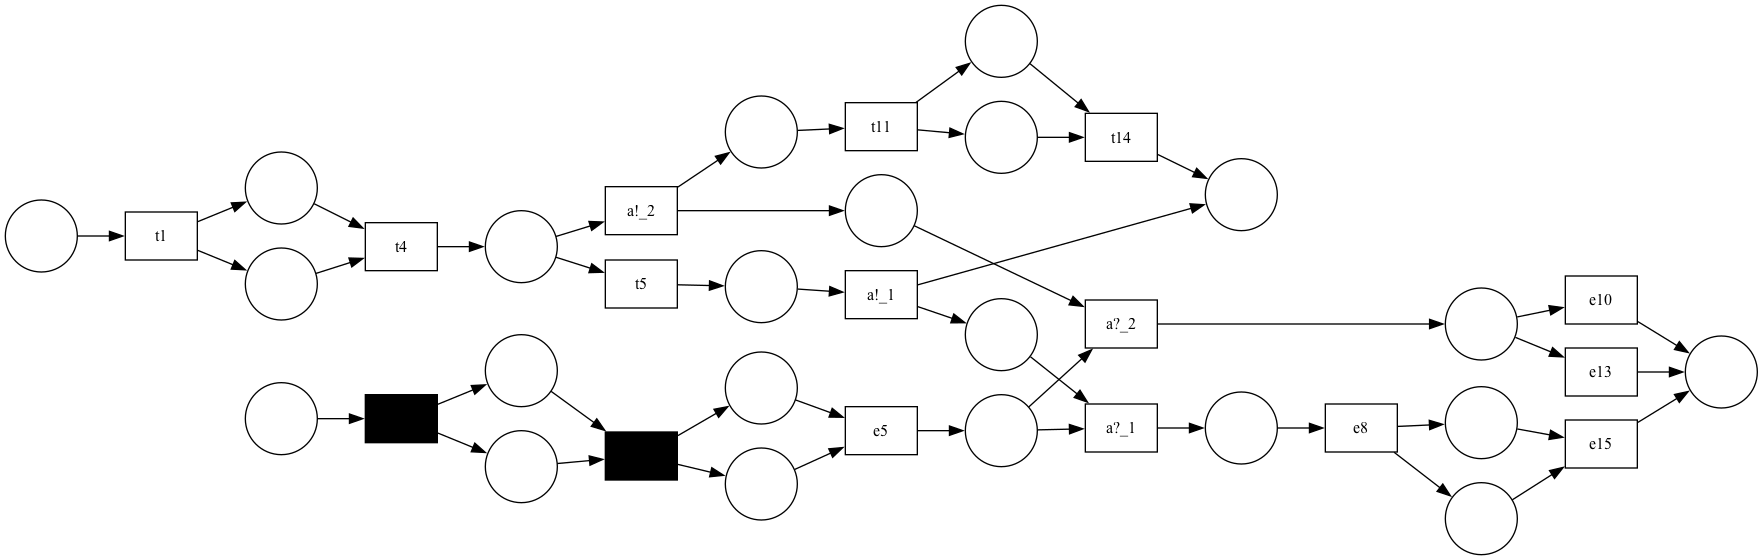

Local transition removed
true 1
true 1
case 2
t5


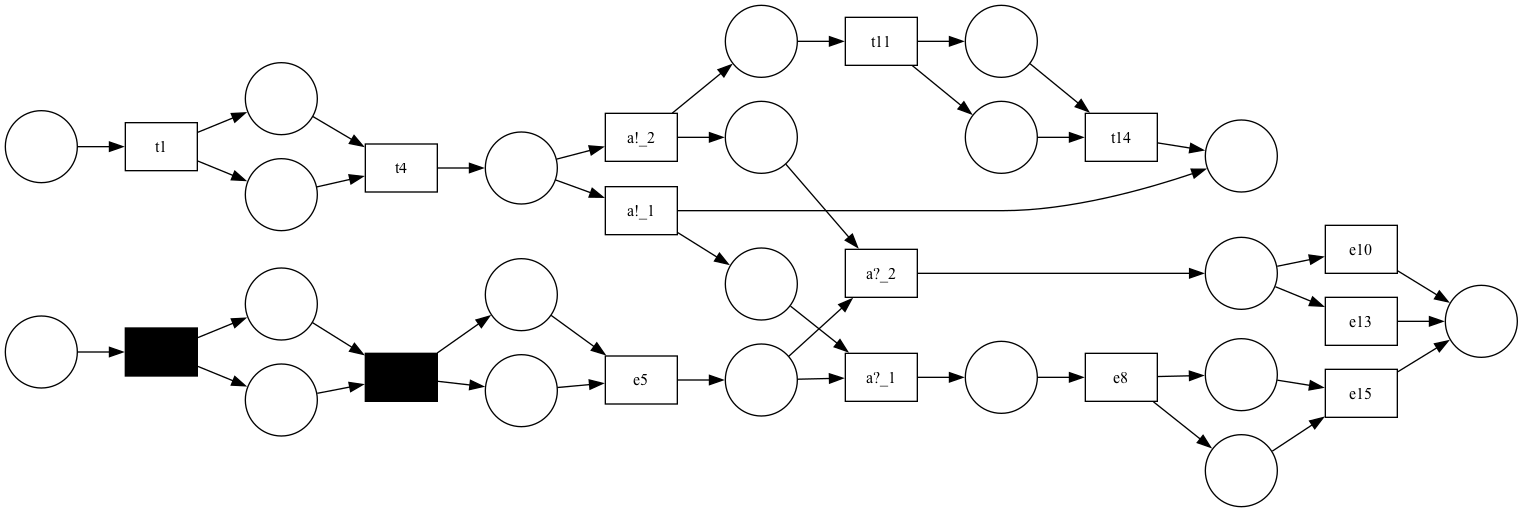

Local transition removed


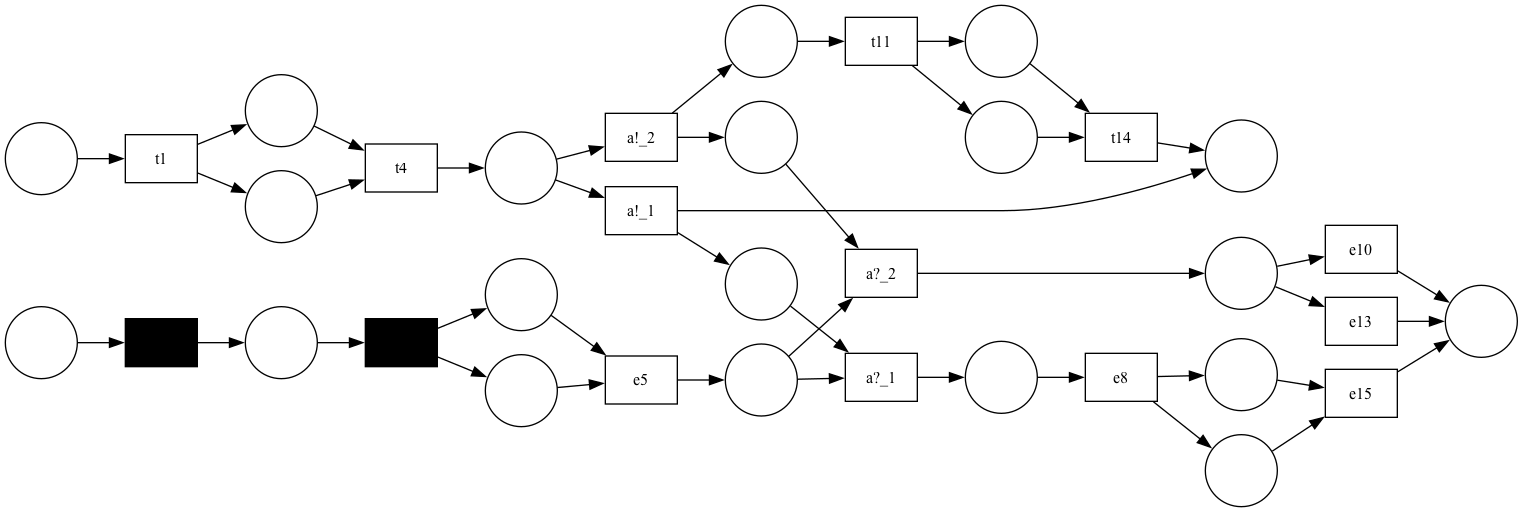

Place removed


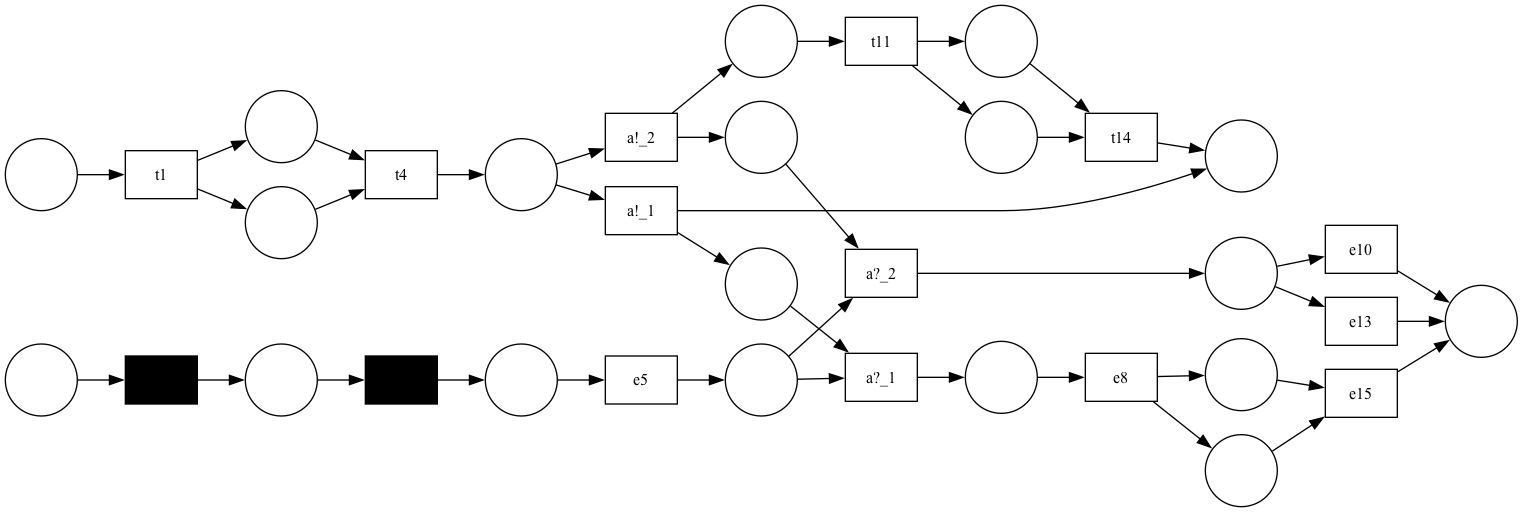

Place removed


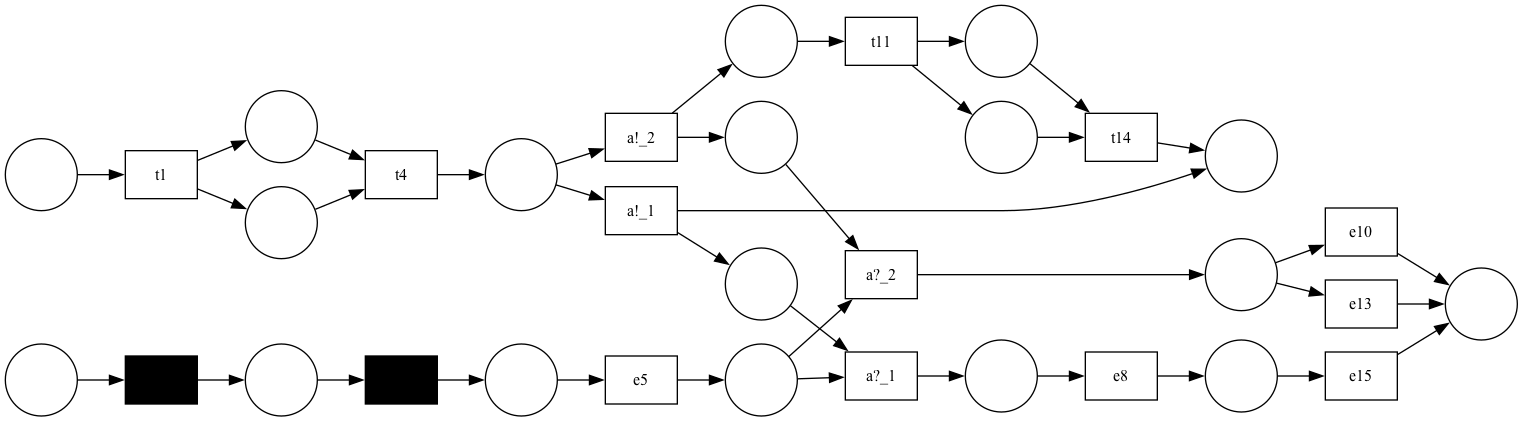

Place removed


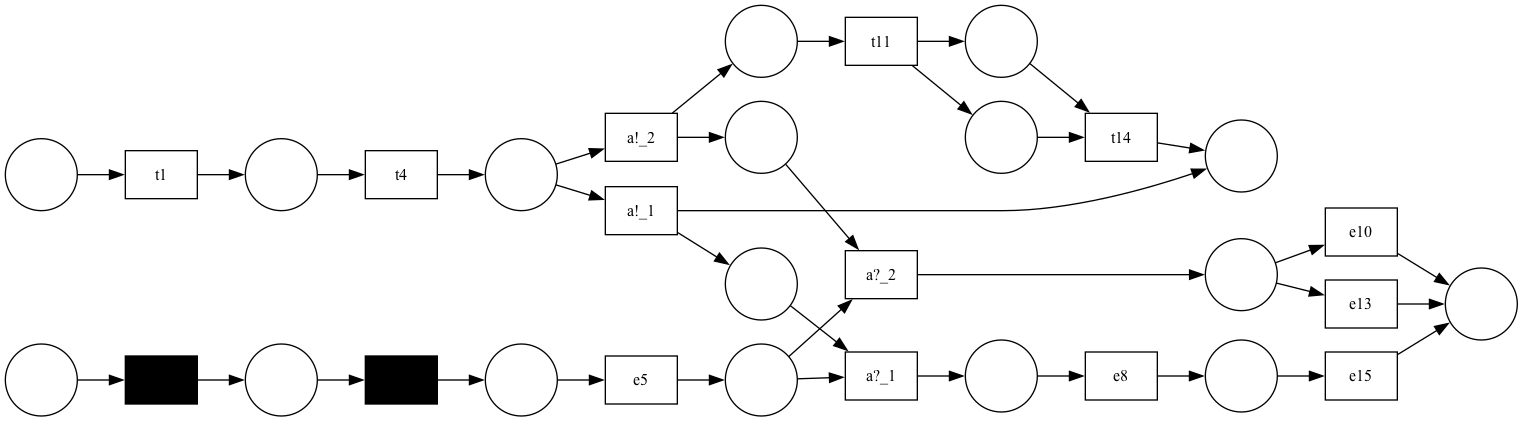

Place removed


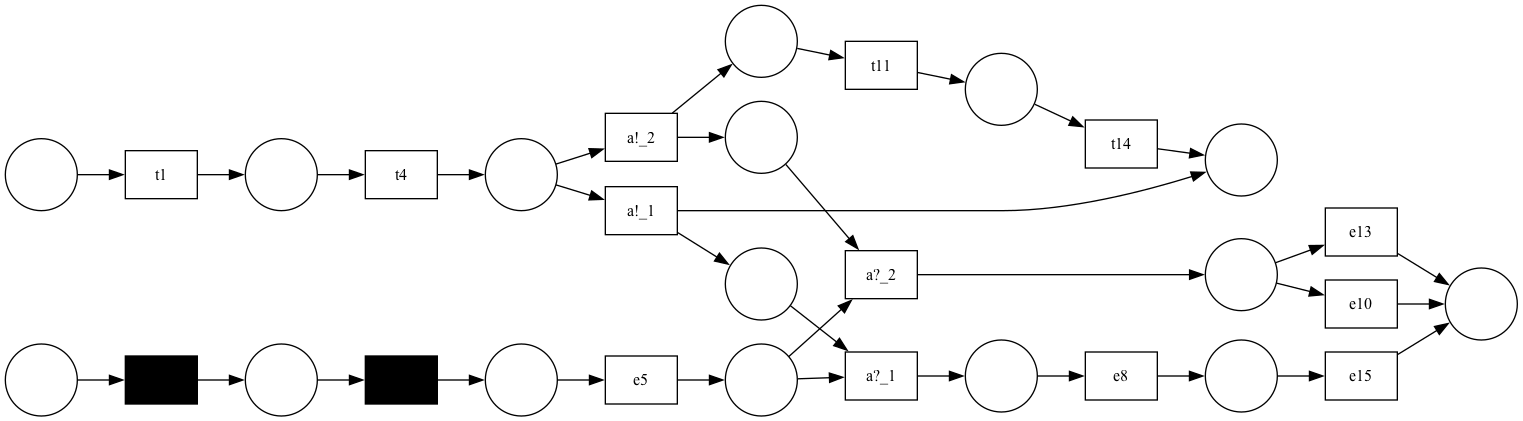

Place removed
removing transition:  e10 e13


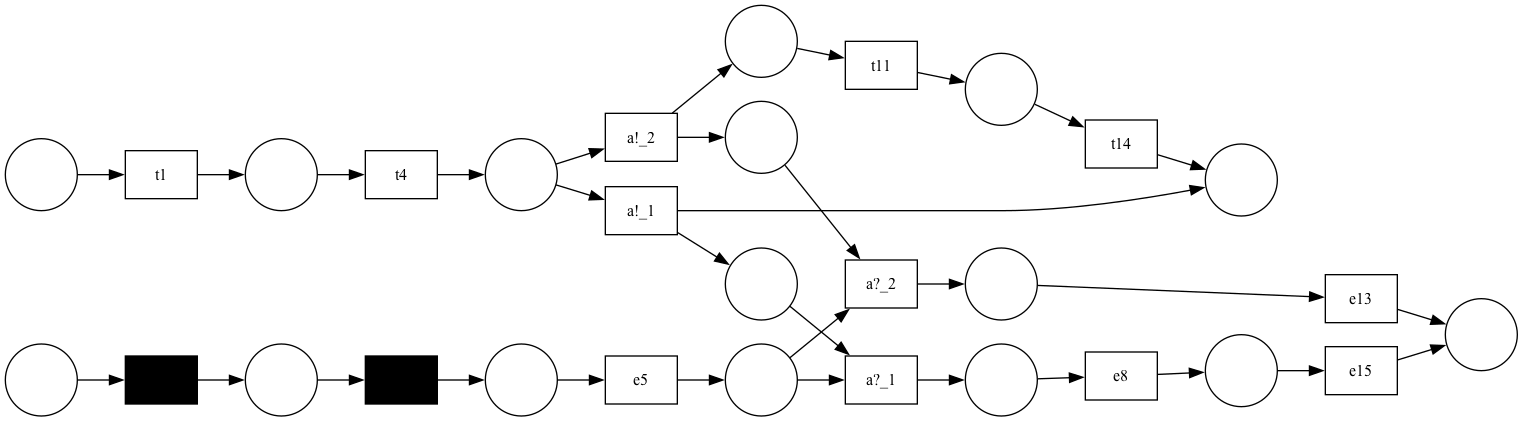

Transition removed
true 1
case 1
e5


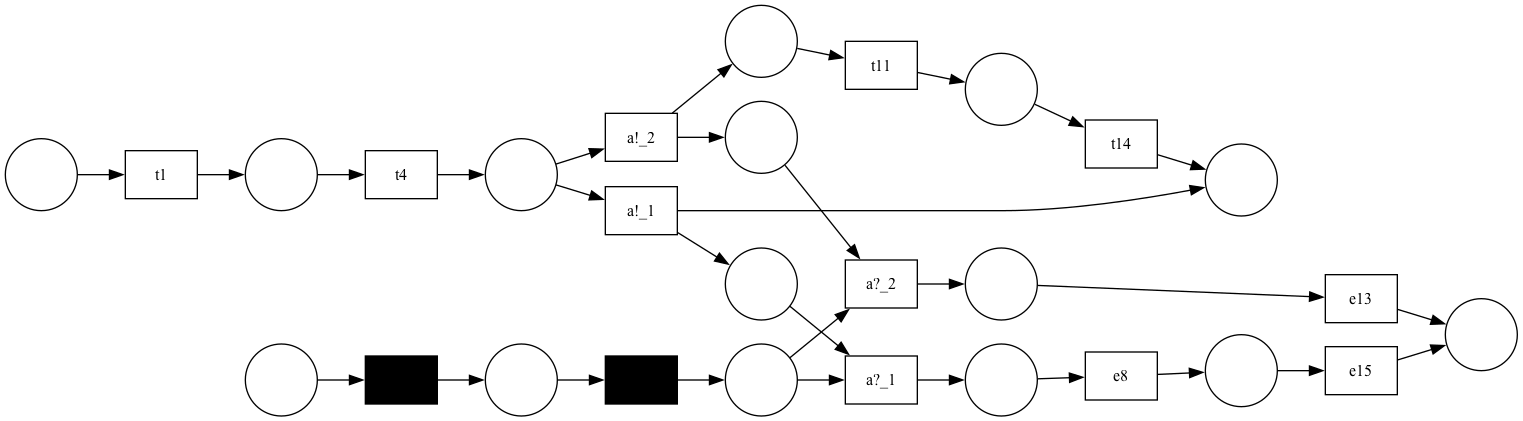

Local transition removed
true 1
case 1
t1


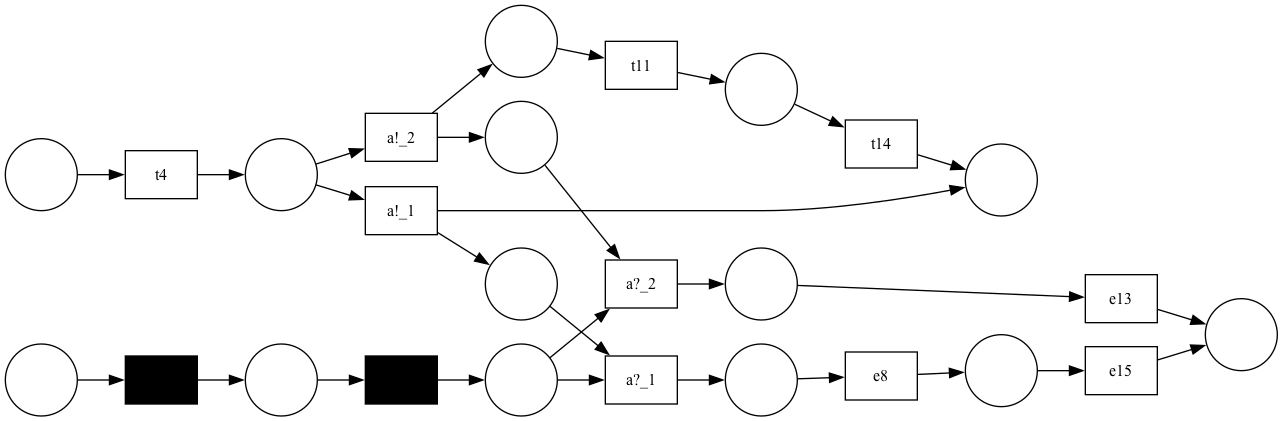

Local transition removed
true 1
case 1
None


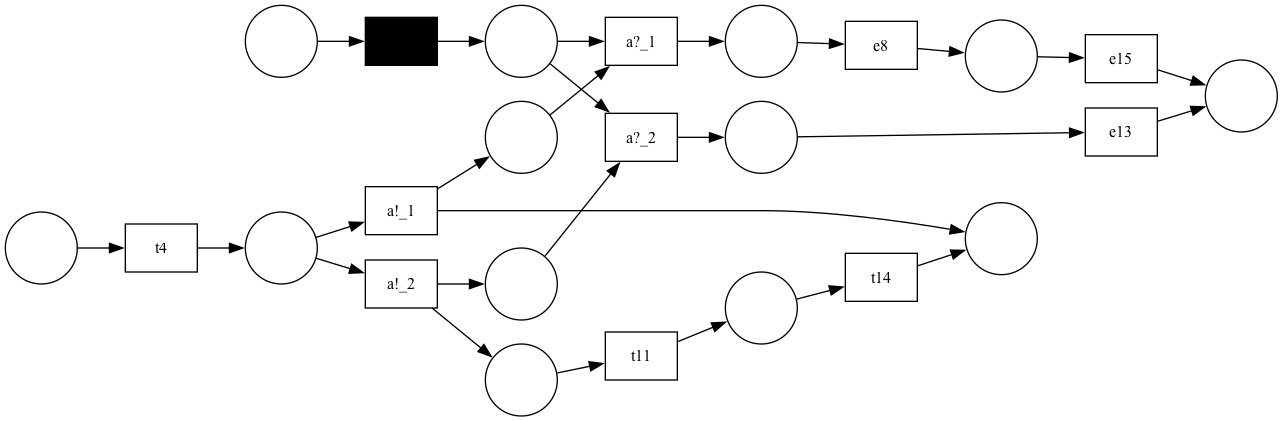

Local transition removed
true 1
case 1
None


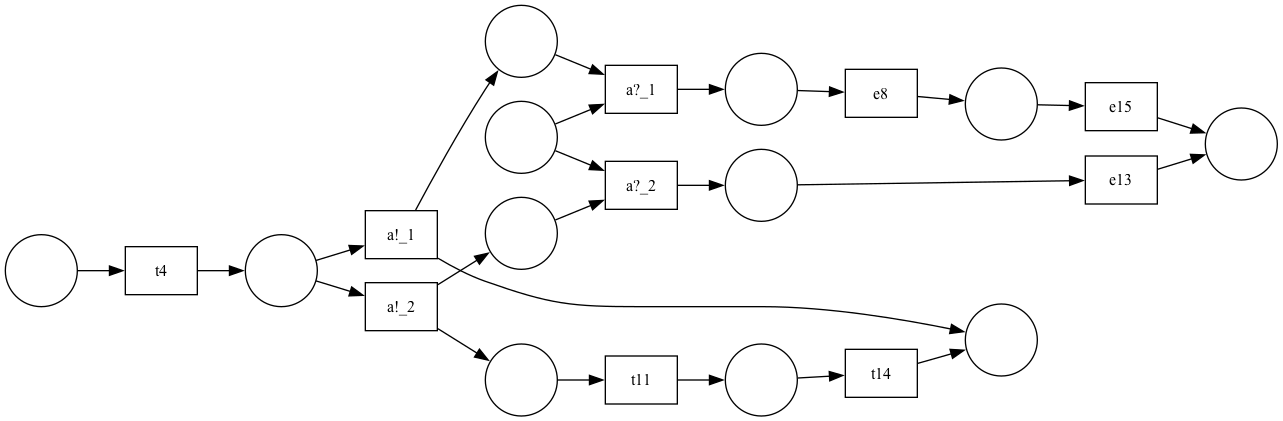

Local transition removed
true 1
case 1
e8


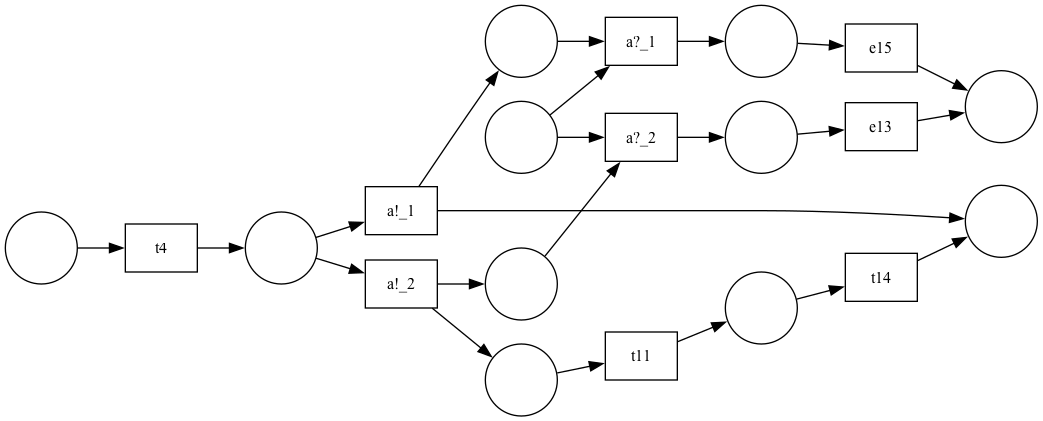

Local transition removed
true 1
case 1
t11


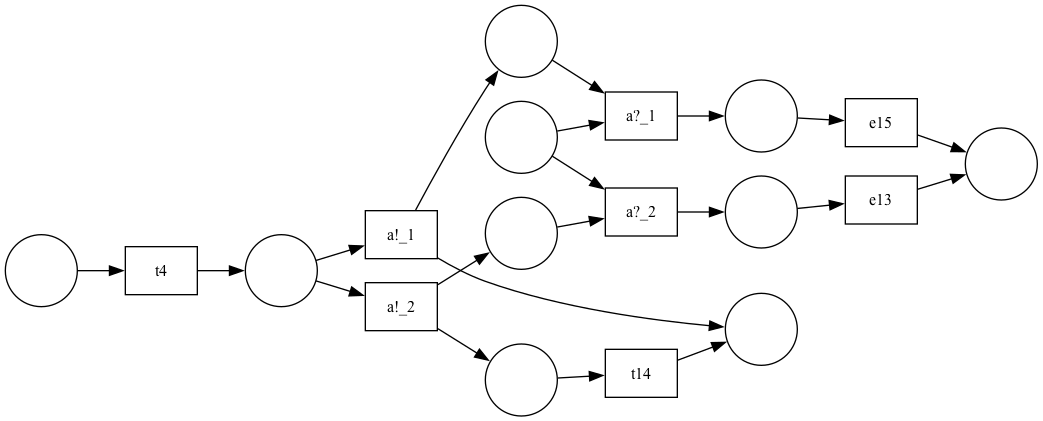

Local transition removed
true 1
case 1
e15


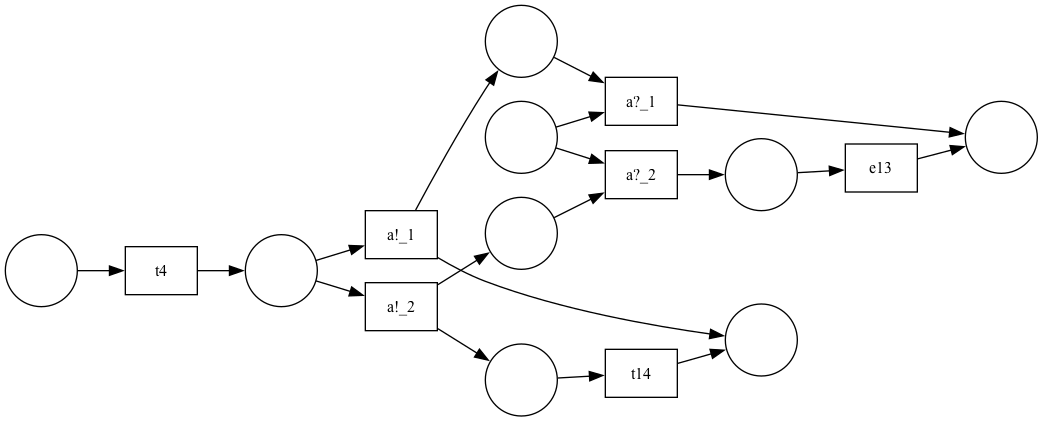

Local transition removed
true 1
case 1
e13


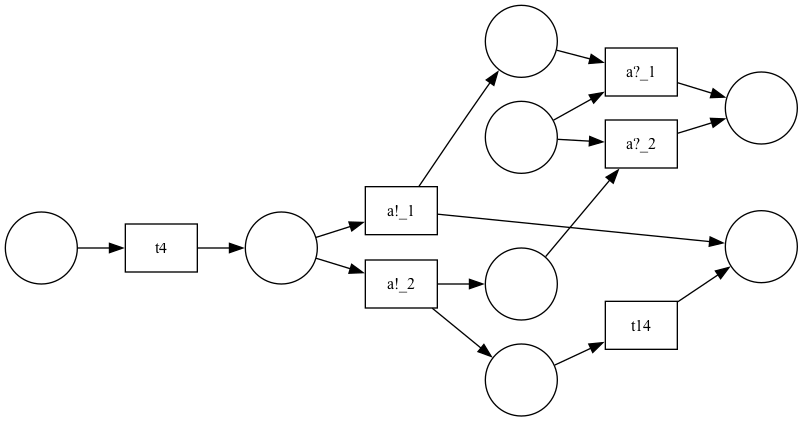

Local transition removed
true 1
case 1
t4


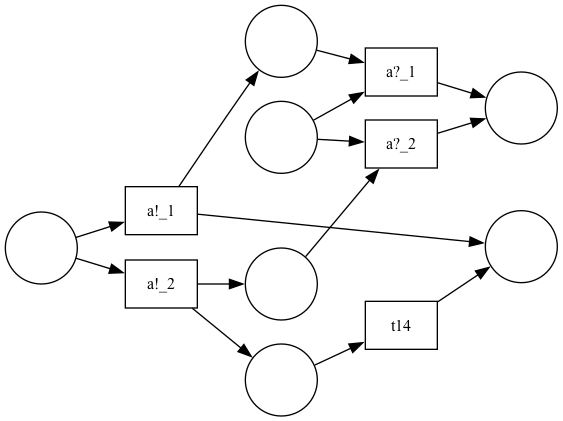

Local transition removed
true 1
case 1
t14


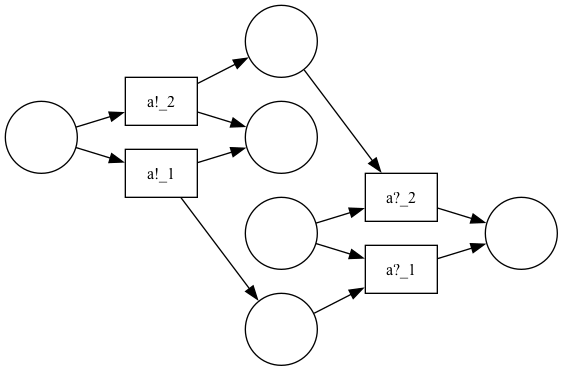

Local transition removed


In [4]:

from pm4py import PetriNet
from refinement_checker import Reducer


def remove_transition(net, transition):
    #check if current transition has one in on out arc (might not be sufficient todo check)
    # find a t1
    for other_trans in net.transitions:
        if(other_trans != transition and petri_utils.pre_set(transition)== petri_utils.pre_set(other_trans) 
            and petri_utils.post_set(transition)==petri_utils.post_set(other_trans)):
            petri_utils.remove_transition(net, transition)
            print("removing transition: ", transition.label, other_trans.label)
            return True
    return False

count = 0
pnet = net.__deepcopy__()
pm4py.view_petri_net(pnet)



while (count <=10):
    count += 1
    for place in pnet.places.copy():
        if not place.properties.keys().__contains__('sync'):
            if Reducer.remove_place(pnet, place):
                pm4py.view_petri_net(pnet)
                print("Place removed")

    for transition in pnet.transitions.copy():
        if not transition.properties.keys().__contains__('sync'):
            if remove_transition(pnet, transition):
                pm4py.view_petri_net(pnet)
                print("Transition removed")
    
    for transition in pnet.transitions.copy():
        if not transition.properties.keys().__contains__('sync'):
            if Reducer.remove_local_transition(pnet, transition):
                pm4py.view_petri_net(pnet)
                print("Local transition removed")



